In [62]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading libraries from SK-Learn.......
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from xgboost import XGBRegressor
# Loading Ensemble Libraries...
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Loading Model selection libraries.....
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.....
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Warnings....
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Reading both Training and Testing file separately....
# Also Making a same column in both named dataset so that at any point we can separate training and testing dataset....
df_train_food=pd.read_excel('Data_Train_Food.xlsx')
df_train_food['Dataset']='Train'

df_test_food=pd.read_excel('Data_Test_Food.xlsx')
df_test_food['Dataset']='Test'

In [64]:
# Concatenating the Training and Testing dataset....
df=pd.concat([df_train_food,df_test_food],ignore_index=True)
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                                                    TIME              TITLE  \
0                 11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)      CASUAL DINING   
1                                   6pm – 11pm (Mon-Sun)  CASUAL DINING,BAR   
2                    11am – 3:30pm, 7pm – 11pm (Mon-Sun)      CASUAL DINING   
3                                11:30am – 1am (Mon-Sun)        QUICK BITES   
4                                   11am – 1am (Mon-Sun)     DESSERT PARLOR   
...                                                  ...                ...   
16916                        11:30am – 11:30pm (Mon-Sun)      CASUAL DINING   
16917                               11am – 1am (Mon-Sun)               None   
16918                         9:30am – 10:30pm (Mon-Sun)        QUICK BITES   
16919  11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...        QUICK BITES   
16920                                5pm – 1am (Mon-Sun)        QUICK BITES   

           VOTES  
0       49 votes  
1       30 votes  
2      221 votes  
3       24 votes  
4      165 votes  
...          ...  
16916  287 votes  
16917  469 votes  
16918   53 votes  
16919        NaN  
16920   63 votes  

[16921 rows x 10 columns]

## Understanding the Data                           

1) FEATURES:                           
   >> TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.             
   >> RESTAURANT_ID: A unique ID for each restaurant.                                  
   >> CUISINES: The variety of cuisines that the restaurant offers.                 
   >> TIME: The open hours of the restaurant.                       
   >> CITY: The city in which the restaurant is located.            
   >> LOCALITY: The locality of the restaurant.                  
   >> RATING: The average rating of the restaurant by customers.            
   >> VOTES: The overall votes received by the restaurant.
                             

2) Target:                                   
   >> COST: The average cost of a two-person meal.               

3) we have to predict the cost of the food.                               

4) As we can see that the data is continuous thus i will use Regression models to train the model.                    

In [65]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 16921 rows and 10 columns.
df.shape

(16921, 10)

In [66]:
# dropping duplicate entries.....
df.drop_duplicates(inplace=True)
df
# Duplicate data deleted...

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                                                    TIME              TITLE  \
0                 11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)      CASUAL DINING   
1                                   6pm – 11pm (Mon-Sun)  CASUAL DINING,BAR   
2                    11am – 3:30pm, 7pm – 11pm (Mon-Sun)      CASUAL DINING   
3                                11:30am – 1am (Mon-Sun)        QUICK BITES   
4                                   11am – 1am (Mon-Sun)     DESSERT PARLOR   
...                                                  ...                ...   
16916                        11:30am – 11:30pm (Mon-Sun)      CASUAL DINING   
16917                               11am – 1am (Mon-Sun)               None   
16918                         9:30am – 10:30pm (Mon-Sun)        QUICK BITES   
16919  11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...        QUICK BITES   
16920                                5pm – 1am (Mon-Sun)        QUICK BITES   

           VOTES  
0       49 votes  
1       30 votes  
2      221 votes  
3       24 votes  
4      165 votes  
...          ...  
16916  287 votes  
16917  469 votes  
16918   53 votes  
16919        NaN  
16920   63 votes  

[16895 rows x 10 columns]

In [67]:
# Printing first few rows....
df.head(10)

CITY    COST                                    CUISINES Dataset  \
0      Thane  1200.0                 Malwani, Goan, North Indian   Train   
1    Chennai  1500.0              Asian, Modern Indian, Japanese   Train   
2    Chennai   800.0  North Indian, Chinese, Biryani, Hyderabadi   Train   
3     Mumbai   800.0                            Tibetan, Chinese   Train   
4     Mumbai   300.0                                    Desserts   Train   
5     Mumbai   800.0     North Indian, Chinese, Seafood, Biryani   Train   
6  Bangalore   600.0  Cafe, Chinese, Pizza, North Indian, Burger   Train   
7    Gurgaon  1600.0                                    Bar Food   Train   
8  Bangalore   300.0                  South Indian, North Indian   Train   
9  Hyderabad   200.0                                North Indian   Train   

                LOCALITY RATING  RESTAURANT_ID  \
0         Dombivali East    3.6           9438   
1              Ramapuram    4.2          13198   
2             Saligramam    3.8          10915   
3            Bandra West    4.1           6346   
4            Lower Parel    3.8          15387   
5        Vile Parle West    4.0           5618   
6  Koramangala 6th Block    4.1           4383   
7              Sector 29    4.3           1249   
8      Bannerghatta Road    3.9           7062   
9           Dilsukhnagar    3.3          10109   

                                                TIME              TITLE  \
0             11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)      CASUAL DINING   
1                               6pm – 11pm (Mon-Sun)  CASUAL DINING,BAR   
2                11am – 3:30pm, 7pm – 11pm (Mon-Sun)      CASUAL DINING   
3                            11:30am – 1am (Mon-Sun)        QUICK BITES   
4                               11am – 1am (Mon-Sun)     DESSERT PARLOR   
5                         12noon – 12:30AM (Mon-Sun)      CASUAL DINING   
6  12noon – 11:30pm (Mon, Tue, Thu, Fri, Sat, Sun...               CAFÉ   
7                                1pm – 1am (Mon-Sun)       MICROBREWERY   
8                            7am – 10:30pm (Mon-Sun)        QUICK BITES   
9                11am – 2pm, 4pm – 10:30pm (Mon-Sun)        QUICK BITES   

        VOTES  
0    49 votes  
1    30 votes  
2   221 votes  
3    24 votes  
4   165 votes  
5   550 votes  
6   509 votes  
7  1612 votes  
8   101 votes  
9   219 votes

In [68]:
# checking the Features information regarding the dataset....
df.info()
# Only one float and one int datatype and rest are object datatype.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 16920
Data columns (total 10 columns):
CITY             16748 non-null object
COST             12665 non-null float64
CUISINES         16895 non-null object
Dataset          16895 non-null object
LOCALITY         16767 non-null object
RATING           16891 non-null object
RESTAURANT_ID    16895 non-null int64
TIME             16895 non-null object
TITLE            16895 non-null object
VOTES            15293 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [69]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in CITY are 450 
Number of unique values in COST are 86 
Number of unique values in CUISINES are 5183 
Number of unique values in Dataset are 2 
Number of unique values in LOCALITY are 1636 
Number of unique values in RATING are 32 
Number of unique values in RESTAURANT_ID are 15574 
Number of unique values in TIME are 3295 
Number of unique values in TITLE are 123 
Number of unique values in VOTES are 2075 


In [70]:
# Checking the Value counts of each Columns using for loop....
for i in df.columns.values:
    if df[i].dtypes=='object':
        print('**************',i,'**************')
        print(df[i].value_counts())
        print('\n')

************** CITY **************
Chennai                            2854
Bangalore                          2831
Hyderabad                          2458
Mumbai                             2301
Kochi                              1750
                                   ... 
Anna Nagar East                       1
Mogappair                             1
Gurgoan                               1
opp gurudwara Shakurpur               1
Bangalore Koramangala 7th Block       1
Name: CITY, Length: 450, dtype: int64


************** CUISINES **************
North Indian                                              714
North Indian, Chinese                                     713
South Indian                                              706
Fast Food                                                 364
Chinese                                                   226
                                                         ... 
Cafe, American, Fast Food                                   1
Chinese, Ita

In [71]:
# Checking the null values...
df.isnull().sum()

CITY              147
COST             4230
CUISINES            0
Dataset             0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1602
dtype: int64

In [72]:
#Check null column values
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head())

          CITY   COST       LOCALITY RATING VOTES
13       Kochi  400.0      Edappally      -   NaN
62       Kochi  200.0    Kalamassery    NEW   NaN
69   New Delhi  200.0        Kalkaji    NEW   NaN
85   Bangalore  300.0    Vijay Nagar      -   NaN
111     Mumbai  800.0  Borivali West    NEW   NaN


# Feature Engineeroing...

In [73]:
#Now we will divide the CUISINES column into multiple columns
#First we will find maximum number of cuisines resutarnt are serving
max_cuisines=-1
for i in range(len(df["CUISINES"])):
    new=len(df["CUISINES"].iloc[i].split(","))
    if new>max_cuisines:
        max_cuisines=new
print("Max number of cuisines serverd are :{}".format(max_cuisines))

Max number of cuisines serverd are :8


In [74]:
# Separating object datatype columns....
obj_col = df.dtypes[df.dtypes == 'object']
obj_col

CITY        object
CUISINES    object
Dataset     object
LOCALITY    object
RATING      object
TIME        object
TITLE       object
VOTES       object
dtype: object

In [75]:
# Making separate Feature for Cuisines , as the restaurants are serving maximum of 8 cuisines thus i have made
# 8 different features....
df['CUISINES_1']=df['CUISINES'].str.split(',').str[0]
df['CUISINES_2']=df['CUISINES'].str.split(',').str[1]
df['CUISINES_3']=df['CUISINES'].str.split(',').str[2]
df['CUISINES_4']=df['CUISINES'].str.split(',').str[3]
df['CUISINES_5']=df['CUISINES'].str.split(',').str[4]
df['CUISINES_6']=df['CUISINES'].str.split(',').str[5]
df['CUISINES_7']=df['CUISINES'].str.split(',').str[6]
df['CUISINES_8']=df['CUISINES'].str.split(',').str[7]
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                                                    TIME              TITLE  \
0                 11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)      CASUAL DINING   
1                                   6pm – 11pm (Mon-Sun)  CASUAL DINING,BAR   
2                    11am – 3:30pm, 7pm – 11pm (Mon-Sun)      CASUAL DINING   
3                                11:30am – 1am (Mon-Sun)        QUICK BITES   
4                                   11am – 1am (Mon-Sun)     DESSERT PARLOR   
...                                                  ...                ...   
16916                        11:30am – 11:30pm (Mon-Sun)      CASUAL DINING   
16917                               11am – 1am (Mon-Sun)               None   
16918                         9:30am – 10:30pm (Mon-Sun)        QUICK BITES   
16919  11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...        QUICK BITES   
16920                                5pm – 1am (Mon-Sun)        QUICK BITES   

           VOTES    CUISINES_1      CUISINES_2     CUISINES_3   CUISINES_4  \
0       49 votes       Malwani            Goan   North Indian          NaN   
1       30 votes         Asian   Modern Indian       Japanese          NaN   
2      221 votes  North Indian         Chinese        Biryani   Hyderabadi   
3       24 votes       Tibetan         Chinese            NaN          NaN   
4      165 votes      Desserts             NaN            NaN          NaN   
...          ...           ...             ...            ...          ...   
16916  287 votes  North Indian         Mughlai        Chinese          NaN   
16917  469 votes       Biryani    North Indian       Sandwich        Salad   
16918   53 votes   Continental    North Indian            NaN          NaN   
16919        NaN         Rolls       Beverages            NaN          NaN   
16920   63 votes       Mughlai             NaN            NaN          NaN   

      CUISINES_5 CUISINES_6 CUISINES_7 CUISINES_8  
0            NaN        NaN        NaN        NaN  
1            NaN        NaN        NaN        NaN  
2            NaN        NaN        NaN        NaN  
3            NaN        NaN        NaN        NaN  
4            NaN        NaN        NaN        NaN  
...          ...        ...        ...        ...  
16916        NaN        NaN        NaN        NaN  
16917      Wraps        NaN        NaN        NaN  
16918        NaN        NaN        NaN        NaN 

In [76]:
# In here i have replaced "," and "-" values so that i can easily separate them in next step....
df.TIME = df.TIME.str.lower()
df.TIME = df.TIME.str.replace(" ","")
df.TIME = df.TIME.str.replace("–",'-')
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                                               TIME              TITLE  \
0                  11am-4pm,7:30pm-11:30pm(mon-sun)      CASUAL DINING   
1                                 6pm-11pm(mon-sun)  CASUAL DINING,BAR   
2                     11am-3:30pm,7pm-11pm(mon-sun)      CASUAL DINING   
3                              11:30am-1am(mon-sun)        QUICK BITES   
4                                 11am-1am(mon-sun)     DESSERT PARLOR   
...                                             ...                ...   
16916                      11:30am-11:30pm(mon-sun)      CASUAL DINING   
16917                             11am-1am(mon-sun)               None   
16918                       9:30am-10:30pm(mon-sun)        QUICK BITES   
16919  11am-11:30pm(mon,tue,wed,thu,sat,sun),3pm...        QUICK BITES   
16920                              5pm-1am(mon-sun)        QUICK BITES   

           VOTES    CUISINES_1      CUISINES_2     CUISINES_3   CUISINES_4  \
0       49 votes       Malwani            Goan   North Indian          NaN   
1       30 votes         Asian   Modern Indian       Japanese          NaN   
2      221 votes  North Indian         Chinese        Biryani   Hyderabadi   
3       24 votes       Tibetan         Chinese            NaN          NaN   
4      165 votes      Desserts             NaN            NaN          NaN   
...          ...           ...             ...            ...          ...   
16916  287 votes  North Indian         Mughlai        Chinese          NaN   
16917  469 votes       Biryani    North Indian       Sandwich        Salad   
16918   53 votes   Continental    North Indian            NaN          NaN   
16919        NaN         Rolls       Beverages            NaN          NaN   
16920   63 votes       Mughlai             NaN            NaN          NaN   

      CUISINES_5 CUISINES_6 CUISINES_7 CUISINES_8  
0            NaN        NaN        NaN        NaN  
1            NaN        NaN        NaN        NaN  
2            NaN        NaN        NaN        NaN  
3            NaN        NaN        NaN        NaN  
4            NaN        NaN        NaN        NaN  
...          ...        ...        ...        ...  
16916        NaN        NaN        NaN        NaN  
16917      Wraps        NaN        NaN        NaN  
16918        NaN        NaN        NaN        NaN  
16919        NaN        NaN        NaN        NaN  
16920 

In [77]:
# Now in this step i have made a separate ['all_days'] feature, which will be storing value==1 if the restaurant is opened 
#                                    all days other wise it will contain value=0....
df['all_days'] = 0
df.loc[df.TIME.str.contains(r'(\(mon\-sun\))'),'all_days'] = 1
df.TIME = df.TIME.str.replace("\(mon-sun\)","")
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                                               TIME              TITLE  \
0                           11am-4pm,7:30pm-11:30pm      CASUAL DINING   
1                                          6pm-11pm  CASUAL DINING,BAR   
2                              11am-3:30pm,7pm-11pm      CASUAL DINING   
3                                       11:30am-1am        QUICK BITES   
4                                          11am-1am     DESSERT PARLOR   
...                                             ...                ...   
16916                               11:30am-11:30pm      CASUAL DINING   
16917                                      11am-1am               None   
16918                                9:30am-10:30pm        QUICK BITES   
16919  11am-11:30pm(mon,tue,wed,thu,sat,sun),3pm...        QUICK BITES   
16920                                       5pm-1am        QUICK BITES   

           VOTES    CUISINES_1      CUISINES_2     CUISINES_3   CUISINES_4  \
0       49 votes       Malwani            Goan   North Indian          NaN   
1       30 votes         Asian   Modern Indian       Japanese          NaN   
2      221 votes  North Indian         Chinese        Biryani   Hyderabadi   
3       24 votes       Tibetan         Chinese            NaN          NaN   
4      165 votes      Desserts             NaN            NaN          NaN   
...          ...           ...             ...            ...          ...   
16916  287 votes  North Indian         Mughlai        Chinese          NaN   
16917  469 votes       Biryani    North Indian       Sandwich        Salad   
16918   53 votes   Continental    North Indian            NaN          NaN   
16919        NaN         Rolls       Beverages            NaN          NaN   
16920   63 votes       Mughlai             NaN            NaN          NaN   

      CUISINES_5 CUISINES_6 CUISINES_7 CUISINES_8  all_days  
0            NaN        NaN        NaN        NaN         1  
1            NaN        NaN        NaN        NaN         1  
2            NaN        NaN        NaN        NaN         1  
3            NaN        NaN        NaN        NaN         1  
4            NaN        NaN        NaN        NaN         1  
...          ...        ...        ...        ...       ...  
16916        NaN        NaN        NaN        NaN         1  
16917      Wraps        NaN        NaN        NaN         1  
16918        NaN    

In [78]:
# Now in this step i have made a separate ['closed_weekend'] feature, which will be storing value==1 if the restaurant is  
#                                closed on weekends other wise it will contain value=0....
df['closed_weekend'] = 0
df.loc[df.TIME.str.contains("closed\(sun\)"),"closed_weekend"] = 1
df.loc[df.TIME.str.contains("closed\(sat\)"),"closed_weekend"] = 1
df.TIME = df.TIME.str.replace("closed\(sun\)","")
df.TIME = df.TIME.str.replace("closed\(sat\)","")
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                                               TIME              TITLE  \
0                           11am-4pm,7:30pm-11:30pm      CASUAL DINING   
1                                          6pm-11pm  CASUAL DINING,BAR   
2                              11am-3:30pm,7pm-11pm      CASUAL DINING   
3                                       11:30am-1am        QUICK BITES   
4                                          11am-1am     DESSERT PARLOR   
...                                             ...                ...   
16916                               11:30am-11:30pm      CASUAL DINING   
16917                                      11am-1am               None   
16918                                9:30am-10:30pm        QUICK BITES   
16919  11am-11:30pm(mon,tue,wed,thu,sat,sun),3pm...        QUICK BITES   
16920                                       5pm-1am        QUICK BITES   

           VOTES    CUISINES_1      CUISINES_2     CUISINES_3   CUISINES_4  \
0       49 votes       Malwani            Goan   North Indian          NaN   
1       30 votes         Asian   Modern Indian       Japanese          NaN   
2      221 votes  North Indian         Chinese        Biryani   Hyderabadi   
3       24 votes       Tibetan         Chinese            NaN          NaN   
4      165 votes      Desserts             NaN            NaN          NaN   
...          ...           ...             ...            ...          ...   
16916  287 votes  North Indian         Mughlai        Chinese          NaN   
16917  469 votes       Biryani    North Indian       Sandwich        Salad   
16918   53 votes   Continental    North Indian            NaN          NaN   
16919        NaN         Rolls       Beverages            NaN          NaN   
16920   63 votes       Mughlai             NaN            NaN          NaN   

      CUISINES_5 CUISINES_6 CUISINES_7 CUISINES_8  all_days  closed_weekend  
0            NaN        NaN        NaN        NaN         1               0  
1            NaN        NaN        NaN        NaN         1               0  
2            NaN        NaN        NaN        NaN         1               0  
3            NaN        NaN        NaN        NaN         1               0  
4            NaN        NaN        NaN        NaN         1               0  
...          ...        ...        ...        ...       ...             ...  
16916        NaN        NaN     

In [79]:
# Now in this step i have made a separate ['closed_weekend'] feature, which will be storing value==1 if the restaurant is  
#                                closed on weekdays other wise it will contain value=0....
df['closed_weekday'] = 0
df.loc[df.TIME.str.contains("closed\(mon\)"),"closed_weekday"] = 1
df.loc[df.TIME.str.contains("closed\(tue\)"),"closed_weekday"] = 1
df.loc[df.TIME.str.contains("closed\(wed\)"),"closed_weekday"] = 1
df.TIME = df.TIME.str.replace("closed\(mon\)","")
df.TIME = df.TIME.str.replace("closed\(tue\)","")
df.TIME = df.TIME.str.replace("closed\(wed\)","")
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                                               TIME              TITLE  \
0                           11am-4pm,7:30pm-11:30pm      CASUAL DINING   
1                                          6pm-11pm  CASUAL DINING,BAR   
2                              11am-3:30pm,7pm-11pm      CASUAL DINING   
3                                       11:30am-1am        QUICK BITES   
4                                          11am-1am     DESSERT PARLOR   
...                                             ...                ...   
16916                               11:30am-11:30pm      CASUAL DINING   
16917                                      11am-1am               None   
16918                                9:30am-10:30pm        QUICK BITES   
16919  11am-11:30pm(mon,tue,wed,thu,sat,sun),3pm...        QUICK BITES   
16920                                       5pm-1am        QUICK BITES   

           VOTES  ...      CUISINES_2     CUISINES_3   CUISINES_4 CUISINES_5  \
0       49 votes  ...            Goan   North Indian          NaN        NaN   
1       30 votes  ...   Modern Indian       Japanese          NaN        NaN   
2      221 votes  ...         Chinese        Biryani   Hyderabadi        NaN   
3       24 votes  ...         Chinese            NaN          NaN        NaN   
4      165 votes  ...             NaN            NaN          NaN        NaN   
...          ...  ...             ...            ...          ...        ...   
16916  287 votes  ...         Mughlai        Chinese          NaN        NaN   
16917  469 votes  ...    North Indian       Sandwich        Salad      Wraps   
16918   53 votes  ...    North Indian            NaN          NaN        NaN   
16919        NaN  ...       Beverages            NaN          NaN        NaN   
16920   63 votes  ...             NaN            NaN          NaN        NaN   

      CUISINES_6 CUISINES_7 CUISINES_8 all_days  closed_weekend  \
0            NaN        NaN        NaN        1               0   
1            NaN        NaN        NaN        1               0   
2            NaN        NaN        NaN        1               0   
3            NaN        NaN        NaN        1               0   
4            NaN        NaN        NaN        1               0   
...          ...        ...        ...      ...             ...   
16916        NaN        NaN        NaN        1               0   
16917        NaN  

In [80]:
# In this i have replaced "(" with  " " in Time...
df.TIME = df.TIME.str.replace("(",' ')
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                                               TIME              TITLE  \
0                           11am-4pm,7:30pm-11:30pm      CASUAL DINING   
1                                          6pm-11pm  CASUAL DINING,BAR   
2                              11am-3:30pm,7pm-11pm      CASUAL DINING   
3                                       11:30am-1am        QUICK BITES   
4                                          11am-1am     DESSERT PARLOR   
...                                             ...                ...   
16916                               11:30am-11:30pm      CASUAL DINING   
16917                                      11am-1am               None   
16918                                9:30am-10:30pm        QUICK BITES   
16919  11am-11:30pm mon,tue,wed,thu,sat,sun),3pm...        QUICK BITES   
16920                                       5pm-1am        QUICK BITES   

           VOTES  ...      CUISINES_2     CUISINES_3   CUISINES_4 CUISINES_5  \
0       49 votes  ...            Goan   North Indian          NaN        NaN   
1       30 votes  ...   Modern Indian       Japanese          NaN        NaN   
2      221 votes  ...         Chinese        Biryani   Hyderabadi        NaN   
3       24 votes  ...         Chinese            NaN          NaN        NaN   
4      165 votes  ...             NaN            NaN          NaN        NaN   
...          ...  ...             ...            ...          ...        ...   
16916  287 votes  ...         Mughlai        Chinese          NaN        NaN   
16917  469 votes  ...    North Indian       Sandwich        Salad      Wraps   
16918   53 votes  ...    North Indian            NaN          NaN        NaN   
16919        NaN  ...       Beverages            NaN          NaN        NaN   
16920   63 votes  ...             NaN            NaN          NaN        NaN   

      CUISINES_6 CUISINES_7 CUISINES_8 all_days  closed_weekend  \
0            NaN        NaN        NaN        1               0   
1            NaN        NaN        NaN        1               0   
2            NaN        NaN        NaN        1               0   
3            NaN        NaN        NaN        1               0   
4            NaN        NaN        NaN        1               0   
...          ...        ...        ...      ...             ...   
16916        NaN        NaN        NaN        1               0   
16917        NaN  

In [81]:
# splitting with " " and splitting with ","
df.TIME = df.TIME.str.strip()
df.TIME = df.TIME.str.split(" ").str.get(0).str.lstrip(',')
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                          TIME              TITLE      VOTES  ...  \
0      11am-4pm,7:30pm-11:30pm      CASUAL DINING   49 votes  ...   
1                     6pm-11pm  CASUAL DINING,BAR   30 votes  ...   
2         11am-3:30pm,7pm-11pm      CASUAL DINING  221 votes  ...   
3                  11:30am-1am        QUICK BITES   24 votes  ...   
4                     11am-1am     DESSERT PARLOR  165 votes  ...   
...                        ...                ...        ...  ...   
16916          11:30am-11:30pm      CASUAL DINING  287 votes  ...   
16917                 11am-1am               None  469 votes  ...   
16918           9:30am-10:30pm        QUICK BITES   53 votes  ...   
16919             11am-11:30pm        QUICK BITES        NaN  ...   
16920                  5pm-1am        QUICK BITES   63 votes  ...   

           CUISINES_2     CUISINES_3   CUISINES_4 CUISINES_5 CUISINES_6  \
0                Goan   North Indian          NaN        NaN        NaN   
1       Modern Indian       Japanese          NaN        NaN        NaN   
2             Chinese        Biryani   Hyderabadi        NaN        NaN   
3             Chinese            NaN          NaN        NaN        NaN   
4                 NaN            NaN          NaN        NaN        NaN   
...               ...            ...          ...        ...        ...   
16916         Mughlai        Chinese          NaN        NaN        NaN   
16917    North Indian       Sandwich        Salad      Wraps        NaN   
16918    North Indian            NaN          NaN        NaN        NaN   
16919       Beverages            NaN          NaN        NaN        NaN   
16920             NaN            NaN          NaN        NaN        NaN   

      CUISINES_7 CUISINES_8 all_days  closed_weekend  closed_weekday  
0            NaN        NaN        1               0               0  
1            NaN        NaN        1               0               0  
2            NaN        NaN        1               0               0  
3            NaN        NaN        1               0               0  
4            NaN        NaN        1               0               0  
...          ...        ...      ...             ...             ...  
16916        NaN        NaN        1               0               0  
16917        NaN        NaN        1               0               0  
16918        NaN        NaN        

In [82]:
# Replacing '-' with " " and ',' with " "
df.TIME = df.TIME.str.replace("-"," ")
df.TIME = df.TIME.str.replace(","," ")
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                          TIME              TITLE      VOTES  ...  \
0      11am 4pm 7:30pm 11:30pm      CASUAL DINING   49 votes  ...   
1                     6pm 11pm  CASUAL DINING,BAR   30 votes  ...   
2         11am 3:30pm 7pm 11pm      CASUAL DINING  221 votes  ...   
3                  11:30am 1am        QUICK BITES   24 votes  ...   
4                     11am 1am     DESSERT PARLOR  165 votes  ...   
...                        ...                ...        ...  ...   
16916          11:30am 11:30pm      CASUAL DINING  287 votes  ...   
16917                 11am 1am               None  469 votes  ...   
16918           9:30am 10:30pm        QUICK BITES   53 votes  ...   
16919             11am 11:30pm        QUICK BITES        NaN  ...   
16920                  5pm 1am        QUICK BITES   63 votes  ...   

           CUISINES_2     CUISINES_3   CUISINES_4 CUISINES_5 CUISINES_6  \
0                Goan   North Indian          NaN        NaN        NaN   
1       Modern Indian       Japanese          NaN        NaN        NaN   
2             Chinese        Biryani   Hyderabadi        NaN        NaN   
3             Chinese            NaN          NaN        NaN        NaN   
4                 NaN            NaN          NaN        NaN        NaN   
...               ...            ...          ...        ...        ...   
16916         Mughlai        Chinese          NaN        NaN        NaN   
16917    North Indian       Sandwich        Salad      Wraps        NaN   
16918    North Indian            NaN          NaN        NaN        NaN   
16919       Beverages            NaN          NaN        NaN        NaN   
16920             NaN            NaN          NaN        NaN        NaN   

      CUISINES_7 CUISINES_8 all_days  closed_weekend  closed_weekday  
0            NaN        NaN        1               0               0  
1            NaN        NaN        1               0               0  
2            NaN        NaN        1               0               0  
3            NaN        NaN        1               0               0  
4            NaN        NaN        1               0               0  
...          ...        ...      ...             ...             ...  
16916        NaN        NaN        1               0               0  
16917        NaN        NaN        1               0               0  
16918        NaN        NaN        

In [83]:
#          Replacing ('12noon','12midnight','24hours','24hours','notavailable','mon','closed',) with 
#                       ('12:01','00:01','00:01 23:59','11am 11pm','11am 11pm','9am 9pm') repectively.....
df.TIME = df.TIME.str.replace("12noon","12:01")
df.TIME = df.TIME.str.replace("12midnight","00:01")
df.TIME[df.TIME.str.contains("24hours")] = "00:01 23:59"
df.TIME[df.TIME.str.contains("notavailable")] = "11am 11pm"
df.TIME[df.TIME.str.contains("mon")] = "11am 11pm"
df.TIME[df.TIME.str.contains("closed")] = "9am 9pm"
df.TIME = df.TIME.str.replace(".","")
df.TIME[df.TIME == ""] = "11am 11pm"
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                          TIME              TITLE      VOTES  ...  \
0      11am 4pm 7:30pm 11:30pm      CASUAL DINING   49 votes  ...   
1                     6pm 11pm  CASUAL DINING,BAR   30 votes  ...   
2         11am 3:30pm 7pm 11pm      CASUAL DINING  221 votes  ...   
3                  11:30am 1am        QUICK BITES   24 votes  ...   
4                     11am 1am     DESSERT PARLOR  165 votes  ...   
...                        ...                ...        ...  ...   
16916          11:30am 11:30pm      CASUAL DINING  287 votes  ...   
16917                 11am 1am               None  469 votes  ...   
16918           9:30am 10:30pm        QUICK BITES   53 votes  ...   
16919             11am 11:30pm        QUICK BITES        NaN  ...   
16920                  5pm 1am        QUICK BITES   63 votes  ...   

           CUISINES_2     CUISINES_3   CUISINES_4 CUISINES_5 CUISINES_6  \
0                Goan   North Indian          NaN        NaN        NaN   
1       Modern Indian       Japanese          NaN        NaN        NaN   
2             Chinese        Biryani   Hyderabadi        NaN        NaN   
3             Chinese            NaN          NaN        NaN        NaN   
4                 NaN            NaN          NaN        NaN        NaN   
...               ...            ...          ...        ...        ...   
16916         Mughlai        Chinese          NaN        NaN        NaN   
16917    North Indian       Sandwich        Salad      Wraps        NaN   
16918    North Indian            NaN          NaN        NaN        NaN   
16919       Beverages            NaN          NaN        NaN        NaN   
16920             NaN            NaN          NaN        NaN        NaN   

      CUISINES_7 CUISINES_8 all_days  closed_weekend  closed_weekday  
0            NaN        NaN        1               0               0  
1            NaN        NaN        1               0               0  
2            NaN        NaN        1               0               0  
3            NaN        NaN        1               0               0  
4            NaN        NaN        1               0               0  
...          ...        ...      ...             ...             ...  
16916        NaN        NaN        1               0               0  
16917        NaN        NaN        1               0               0  
16918        NaN        NaN        

In [84]:
# Splitting TITLE with "," and storing them in new features ['TITLE_1'], ['TITLE_2']
df['TITLE_1']=df['TITLE'].str.split(',').str[0]
df['TITLE_2']=df['TITLE'].str.split(',').str[1]
df

CITY    COST                                       CUISINES  \
0            Thane  1200.0                    Malwani, Goan, North Indian   
1          Chennai  1500.0                 Asian, Modern Indian, Japanese   
2          Chennai   800.0     North Indian, Chinese, Biryani, Hyderabadi   
3           Mumbai   800.0                               Tibetan, Chinese   
4           Mumbai   300.0                                       Desserts   
...            ...     ...                                            ...   
16916    New Delhi     NaN                 North Indian, Mughlai, Chinese   
16917    Bangalore     NaN  Biryani, North Indian, Sandwich, Salad, Wraps   
16918    Faridabad     NaN                      Continental, North Indian   
16919        Kochi     NaN                               Rolls, Beverages   
16920  Bandra West     NaN                                        Mughlai   

      Dataset          LOCALITY RATING  RESTAURANT_ID  \
0       Train    Dombivali East    3.6           9438   
1       Train         Ramapuram    4.2          13198   
2       Train        Saligramam    3.8          10915   
3       Train       Bandra West    4.1           6346   
4       Train       Lower Parel    3.8          15387   
...       ...               ...    ...            ...   
16916    Test      Punjabi Bagh    3.9           9057   
16917    Test        HSR Layout    4.3           1247   
16918    Test         Sector 86    3.7           8617   
16919    Test             Kochi      -           6485   
16920    Test  Perry Cross Road    3.7           2421   

                          TIME              TITLE      VOTES  ...  \
0      11am 4pm 7:30pm 11:30pm      CASUAL DINING   49 votes  ...   
1                     6pm 11pm  CASUAL DINING,BAR   30 votes  ...   
2         11am 3:30pm 7pm 11pm      CASUAL DINING  221 votes  ...   
3                  11:30am 1am        QUICK BITES   24 votes  ...   
4                     11am 1am     DESSERT PARLOR  165 votes  ...   
...                        ...                ...        ...  ...   
16916          11:30am 11:30pm      CASUAL DINING  287 votes  ...   
16917                 11am 1am               None  469 votes  ...   
16918           9:30am 10:30pm        QUICK BITES   53 votes  ...   
16919             11am 11:30pm        QUICK BITES        NaN  ...   
16920                  5pm 1am        QUICK BITES   63 votes  ...   

        CUISINES_4 CUISINES_5 CUISINES_6 CUISINES_7 CUISINES_8 all_days  \
0              NaN        NaN        NaN        NaN        NaN        1   
1              NaN        NaN        NaN        NaN        NaN        1   
2       Hyderabadi        NaN        NaN        NaN        NaN        1   
3              NaN        NaN        NaN        NaN        NaN        1   
4              NaN        NaN        NaN        NaN        NaN        1   
...            ...        ...        ...        ...        ...      ...   
16916          NaN        NaN        NaN        NaN        NaN        1   
16917        Salad      Wraps        NaN        NaN        NaN        1   
16918          NaN        NaN        NaN        NaN        NaN        1   
16919          NaN        NaN        NaN        NaN        NaN        0   
16920          NaN        NaN        NaN        NaN        NaN        1   

      closed_weekend closed_weekday         TITLE_1  TITLE_2  
0                  0              0   CASUAL DINING      NaN  
1                  0              0   CASUAL DINING      BAR  
2                  0              0   CASUAL DINING      NaN  
3                  0              0     QUICK BITES      NaN  
4                  0              0  DESSERT PARLOR      NaN  
...              ...            ...             ...      ...  
16916              0              0   CASUAL DINING      NaN  
16917              0              0            None      NaN  
16918              0              0     QUICK BITES      NaN  
16919              0              0     QUIC

In [85]:
# checking null values in 'VOTES'
df.loc[df['VOTES'].isnull()]

CITY   COST                            CUISINES Dataset  \
13         Kochi  400.0                        South Indian   Train   
62         Kochi  200.0             North Indian, Beverages   Train   
69     New Delhi  200.0                    Pizza, Fast Food   Train   
85     Bangalore  300.0          North Indian, South Indian   Train   
111       Mumbai  800.0  Gujarati, Rajasthani, North Indian   Train   
...          ...    ...                                 ...     ...   
16873      Noida    NaN                  Cafe, North Indian    Test   
16875  New Delhi    NaN                           Fast Food    Test   
16888  Bangalore    NaN                         Continental    Test   
16913     Mumbai    NaN                 Sindhi, Street Food    Test   
16919      Kochi    NaN                    Rolls, Beverages    Test   

            LOCALITY RATING  RESTAURANT_ID                     TIME  \
13         Edappally      -           4319             11am 11:30pm   
62       Kalamassery    NEW           7841                11am 11pm   
69           Kalkaji    NEW          11096                11am 11pm   
85       Vijay Nagar      -          12657           7:30am 10:30pm   
111    Borivali West    NEW           7095  11:30am 3:30pm 7pm 11pm   
...              ...    ...            ...                      ...   
16873      Sector 63    NEW           7007                11am 11pm   
16875  Shalimar Bagh    NEW           6387          12:30pm 10:30pm   
16888    Indiranagar    NEW          13381               11am 00:01   
16913    Lower Parel    NEW           6887  11:30am 4pm 7pm 11:30pm   
16919          Kochi      -           6485             11am 11:30pm   

               TITLE VOTES  ... CUISINES_4 CUISINES_5 CUISINES_6 CUISINES_7  \
13     CASUAL DINING   NaN  ...        NaN        NaN        NaN        NaN   
62       QUICK BITES   NaN  ...        NaN        NaN        NaN        NaN   
69              None   NaN  ...        NaN        NaN        NaN        NaN   
85       QUICK BITES   NaN  ...        NaN        NaN        NaN        NaN   
111    CASUAL DINING   NaN  ...        NaN        NaN        NaN        NaN   
...              ...   ...  ...        ...        ...        ...        ...   
16873           CAFÉ   NaN  ...        NaN        NaN        NaN        NaN   
16875    QUICK BITES   NaN  ...        NaN        NaN        NaN        NaN   
16888    QUICK BITES   NaN  ...        NaN        NaN        NaN        NaN   
16913  CASUAL DINING   NaN  ...        NaN        NaN        NaN        NaN   
16919    QUICK BITES   NaN  ...        NaN        NaN        NaN        NaN   

      CUISINES_8 all_days closed_weekend closed_weekday        TITLE_1  \
13           NaN        1              0              0  CASUAL DINING   
62           NaN        1              0              0    QUICK BITES   
69           NaN        1              0              0           None   
85           NaN        0              0              1    QUICK BITES   
111          NaN        1              0              0  CASUAL DINING   
...          ...      ...            ...            ...            ...   
16873        NaN        1              0              0           CAFÉ   
16875        NaN        1              0              0    QUICK BITES   
16888        NaN        1              0              0    QUICK BITES   
16913        NaN        1              0              0  CASUAL DINING   
16919        NaN        0              0              0    QUICK BITES   

       TITLE_2  
13         NaN  
62         NaN  
69         NaN  
85         NaN  
111        NaN  
...        ...  
16873      NaN  
16875      NaN  
16888      NaN  
16913      NaN  
16919      NaN  

[1602 rows x 23 columns]

In [86]:
# Stripping off 'votes' from "VOTES"
df['VOTES']=df['VOTES'].str.strip('votes')
df['VOTES']

0         49 
1         30 
2        221 
3         24 
4        165 
         ... 
16916    287 
16917    469 
16918     53 
16919     NaN
16920     63 
Name: VOTES, Length: 16895, dtype: object

In [87]:
# filling up null values with "0"
df['VOTES'].fillna(0,inplace=True)
df['VOTES']

0         49 
1         30 
2        221 
3         24 
4        165 
         ... 
16916    287 
16917    469 
16918     53 
16919       0
16920     63 
Name: VOTES, Length: 16895, dtype: object

In [88]:
# Now replacing "NEW" and "-" with nan values and then changing the datatype of "RATING"
df['RATING'] = df['RATING'].replace("NEW",np.nan)
df['RATING'] = df['RATING'].replace("-",np.nan)
df['RATING'] = df['RATING'].astype('float')
df['RATING']

0        3.6
1        4.2
2        3.8
3        4.1
4        3.8
        ... 
16916    3.9
16917    4.3
16918    3.7
16919    NaN
16920    3.7
Name: RATING, Length: 16895, dtype: float64

In [89]:
# filling up nan values of RATING Feature with mean values....
df.RATING.fillna(df.RATING.mean(), inplace=True)

In [90]:
# Filling up null values of 'CITY' and 'LOCALITY' with the "missing" value....
df["CITY"].fillna("missing",inplace=True)
df["LOCALITY"].fillna("missing",inplace=True)

In [91]:
#       Filling up Featured CUISINES with the "NA"values, so that if a particular restaurant is not offereing 
#                   a specific cuisine then it will show "NA" value...
df["CUISINES_2"].fillna("NA",inplace=True)
df["CUISINES_3"].fillna("NA",inplace=True)
df["CUISINES_4"].fillna("NA",inplace=True)
df["CUISINES_5"].fillna("NA",inplace=True)
df["CUISINES_6"].fillna("NA",inplace=True)
df["CUISINES_7"].fillna("NA",inplace=True)
df["CUISINES_8"].fillna("NA",inplace=True)
df["TITLE_2"].fillna("NA",inplace=True)

In [92]:
# Checking null values....
df.isnull().sum()

CITY                 0
COST              4230
CUISINES             0
Dataset              0
LOCALITY             0
RATING               0
RESTAURANT_ID        0
TIME                 0
TITLE                0
VOTES                0
CUISINES_1           0
CUISINES_2           0
CUISINES_3           0
CUISINES_4           0
CUISINES_5           0
CUISINES_6           0
CUISINES_7           0
CUISINES_8           0
all_days             0
closed_weekend       0
closed_weekday       0
TITLE_1              0
TITLE_2              0
dtype: int64

In [93]:
# Changing the datatype of  "RATING" and "VOTES" from object type to int float type....
df['RATING'] = df['RATING'].astype('float')
df['VOTES'] = df['VOTES'].astype('float')

In [94]:
# Checking datatypes...
df.dtypes

CITY               object
COST              float64
CUISINES           object
Dataset            object
LOCALITY           object
RATING            float64
RESTAURANT_ID       int64
TIME               object
TITLE              object
VOTES             float64
CUISINES_1         object
CUISINES_2         object
CUISINES_3         object
CUISINES_4         object
CUISINES_5         object
CUISINES_6         object
CUISINES_7         object
CUISINES_8         object
all_days            int64
closed_weekend      int64
closed_weekday      int64
TITLE_1            object
TITLE_2            object
dtype: object

In [95]:
# Dropping Features on which feature engineering is done so that data duplication won't occur....
df.drop(['RESTAURANT_ID','CUISINES','TIME','TITLE'],axis=1,inplace=True)
df

CITY    COST Dataset          LOCALITY    RATING  VOTES  \
0            Thane  1200.0   Train    Dombivali East  3.600000   49.0   
1          Chennai  1500.0   Train         Ramapuram  4.200000   30.0   
2          Chennai   800.0   Train        Saligramam  3.800000  221.0   
3           Mumbai   800.0   Train       Bandra West  4.100000   24.0   
4           Mumbai   300.0   Train       Lower Parel  3.800000  165.0   
...            ...     ...     ...               ...       ...    ...   
16916    New Delhi     NaN    Test      Punjabi Bagh  3.900000  287.0   
16917    Bangalore     NaN    Test        HSR Layout  4.300000  469.0   
16918    Faridabad     NaN    Test         Sector 86  3.700000   53.0   
16919        Kochi     NaN    Test             Kochi  3.784293    0.0   
16920  Bandra West     NaN    Test  Perry Cross Road  3.700000   63.0   

         CUISINES_1      CUISINES_2     CUISINES_3   CUISINES_4 CUISINES_5  \
0           Malwani            Goan   North Indian           NA         NA   
1             Asian   Modern Indian       Japanese           NA         NA   
2      North Indian         Chinese        Biryani   Hyderabadi         NA   
3           Tibetan         Chinese             NA           NA         NA   
4          Desserts              NA             NA           NA         NA   
...             ...             ...            ...          ...        ...   
16916  North Indian         Mughlai        Chinese           NA         NA   
16917       Biryani    North Indian       Sandwich        Salad      Wraps   
16918   Continental    North Indian             NA           NA         NA   
16919         Rolls       Beverages             NA           NA         NA   
16920       Mughlai              NA             NA           NA         NA   

      CUISINES_6 CUISINES_7 CUISINES_8  all_days  closed_weekend  \
0             NA         NA         NA         1               0   
1             NA         NA         NA         1               0   
2             NA         NA         NA         1               0   
3             NA         NA         NA         1               0   
4             NA         NA         NA         1               0   
...          ...        ...        ...       ...             ...   
16916         NA         NA         NA         1               0   
16917         NA         NA         NA         1               0   
16918         NA         NA         NA         1               0   
16919         NA         NA         NA         0               0   
16920         NA         NA         NA         1               0   

       closed_weekday         TITLE_1 TITLE_2  
0                   0   CASUAL DINING      NA  
1                   0   CASUAL DINING     BAR  
2                   0   CASUAL DINING      NA  
3                   0     QUICK BITES      NA  
4                   0  DESSERT PARLOR      NA  
...               ...             ...     ...  
16916               0   CASUAL DINING      NA  
16917               0            None      NA  
16918               0     QUICK BITES      NA  
16919               0     QUICK BITES      NA  
16920               0     QUICK BITES      NA  

[16895 rows x 19 columns]

## Univariant Analysis

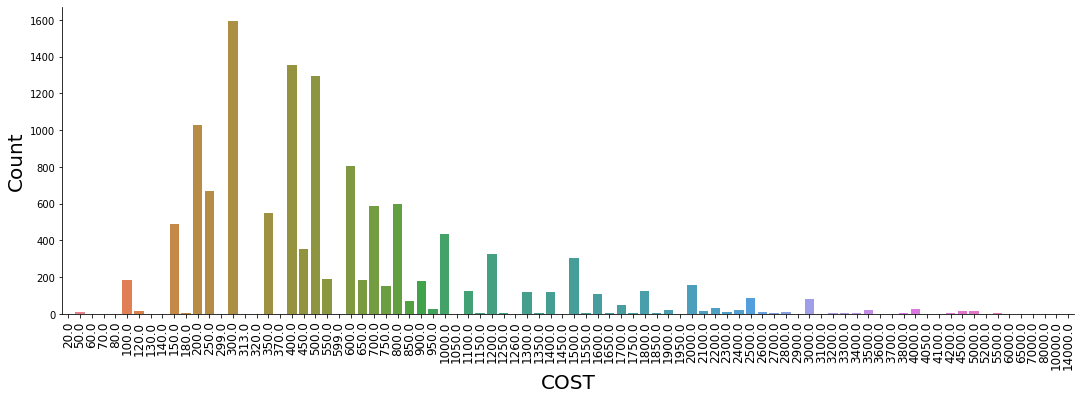

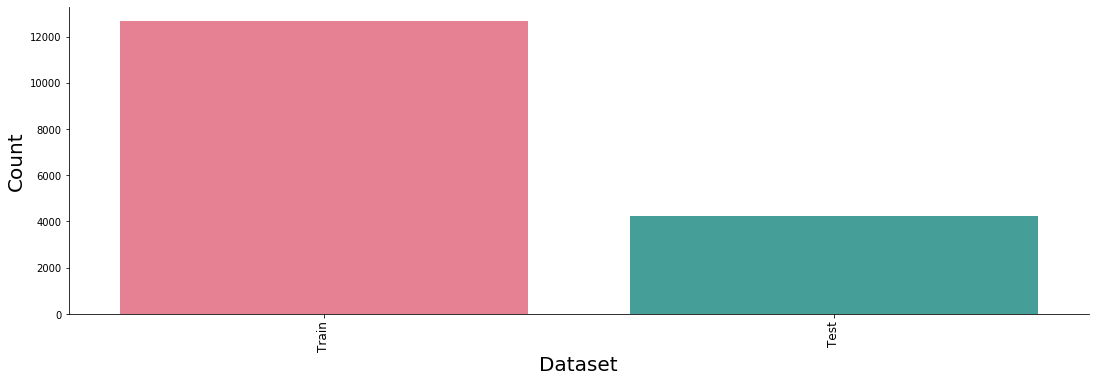

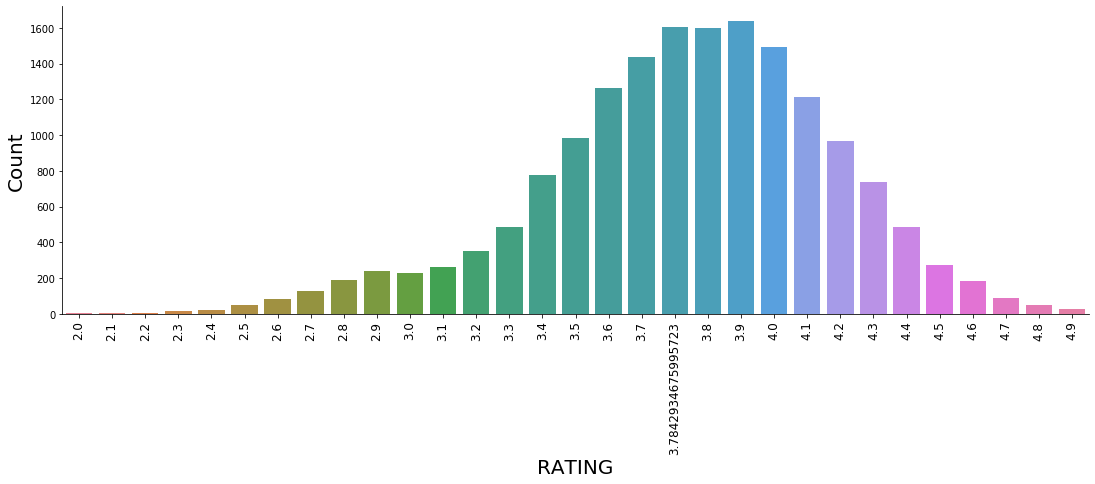

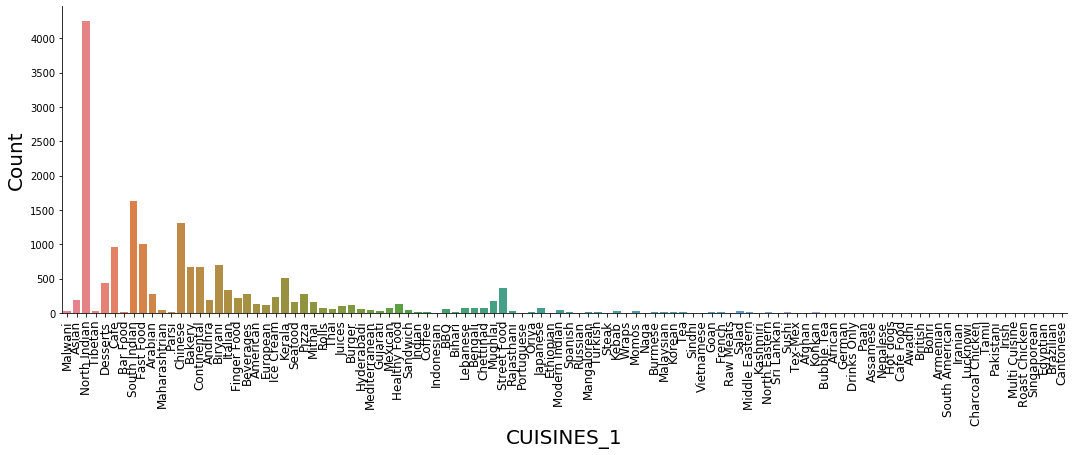

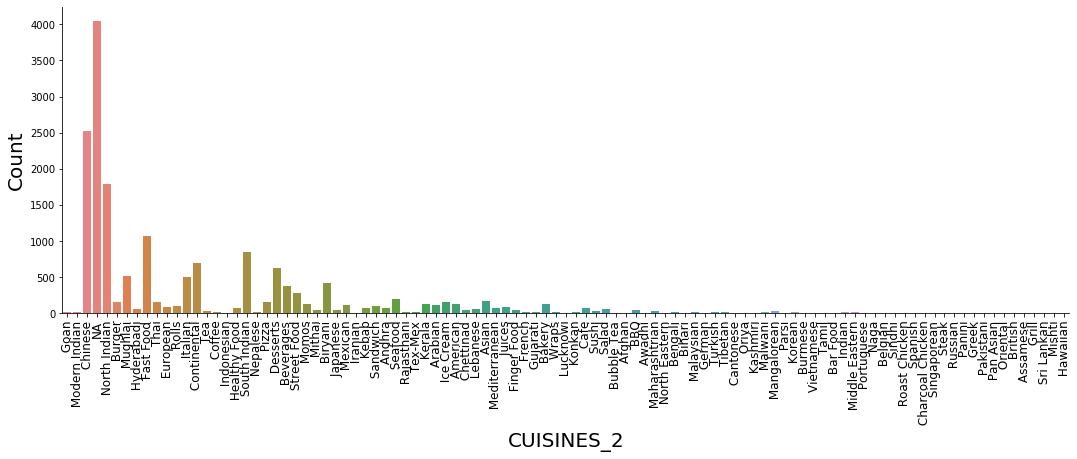

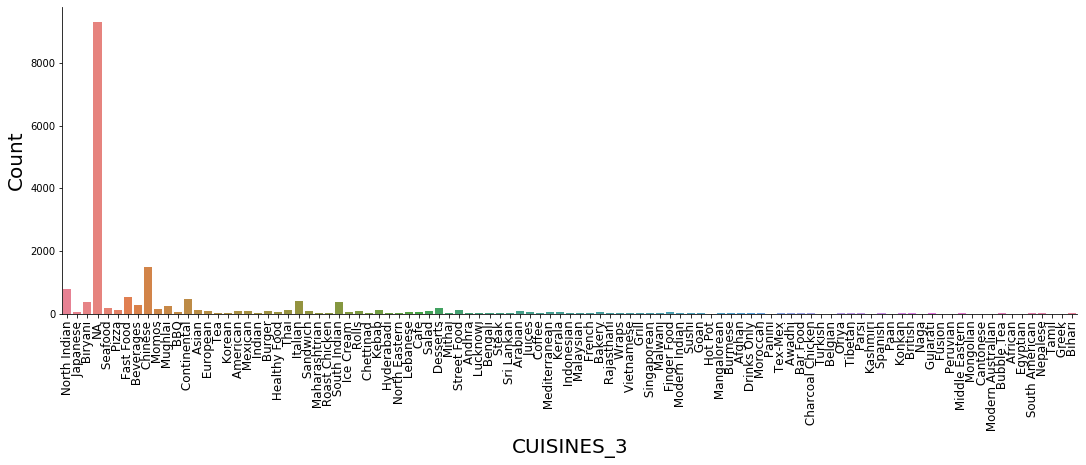

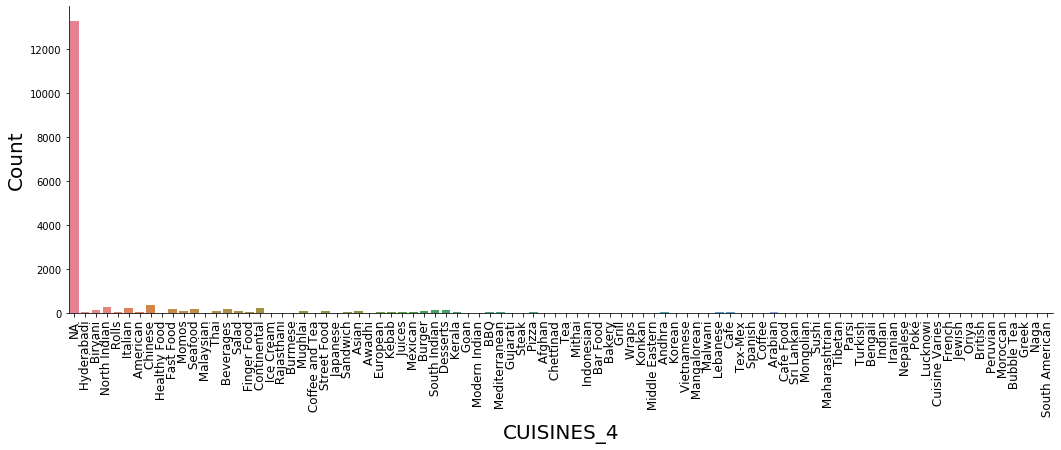

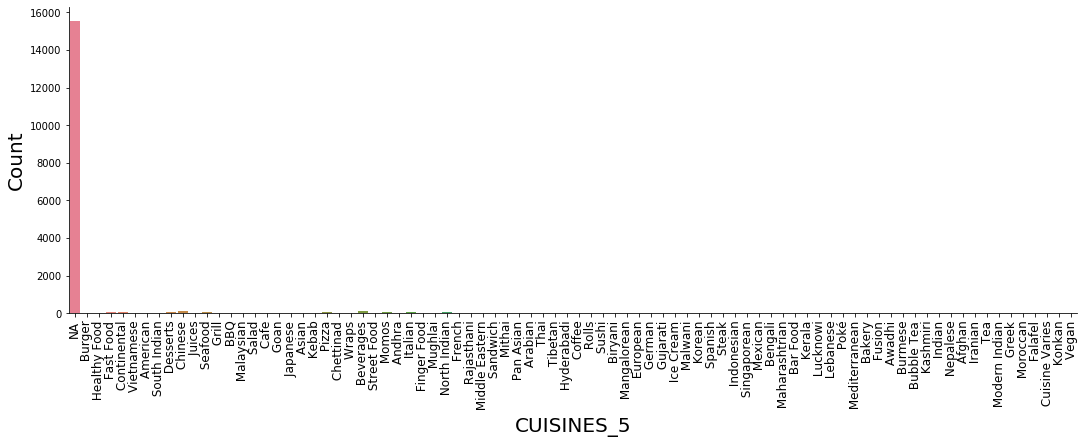

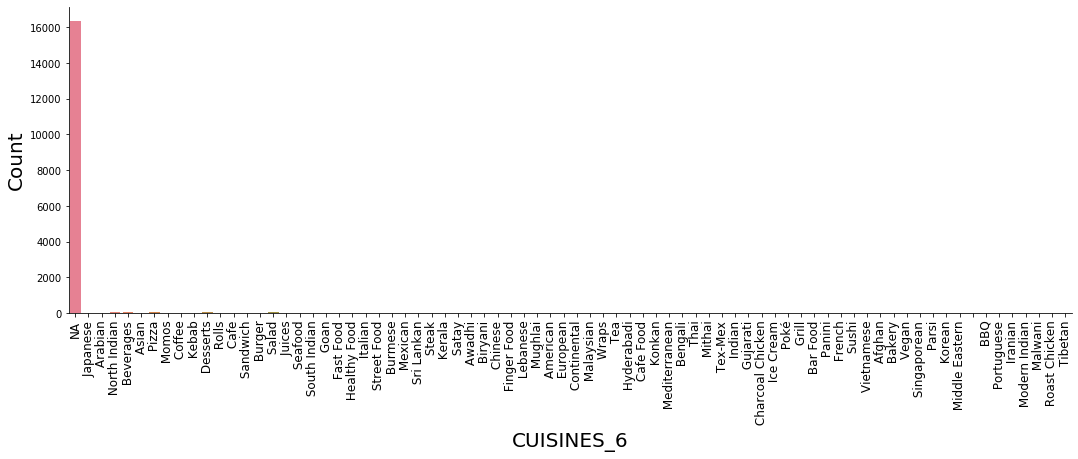

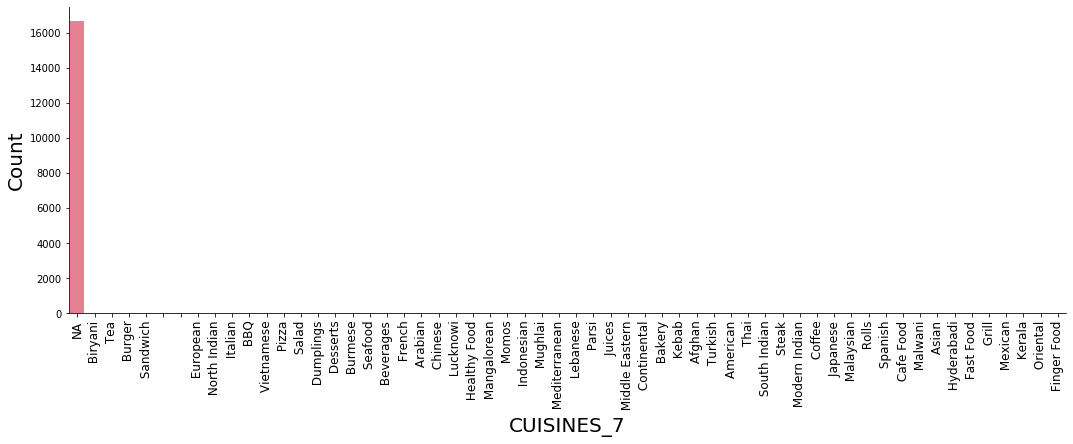

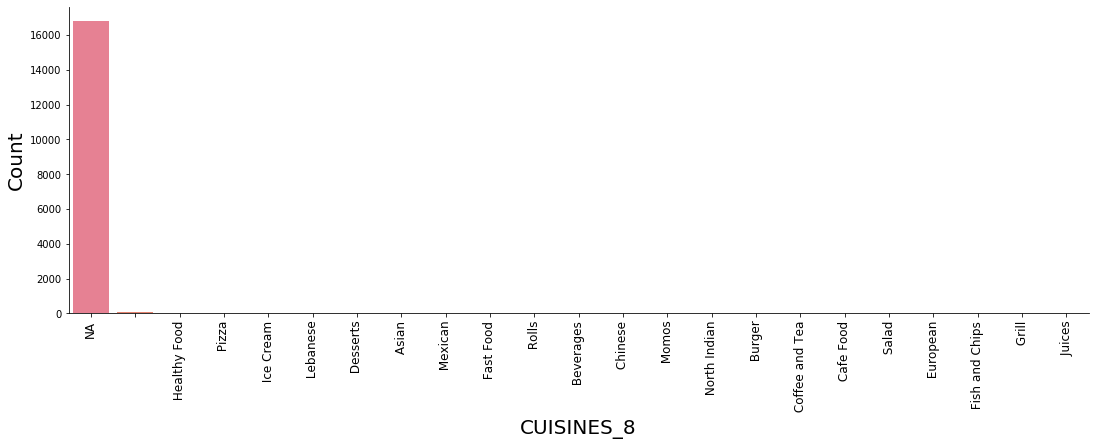

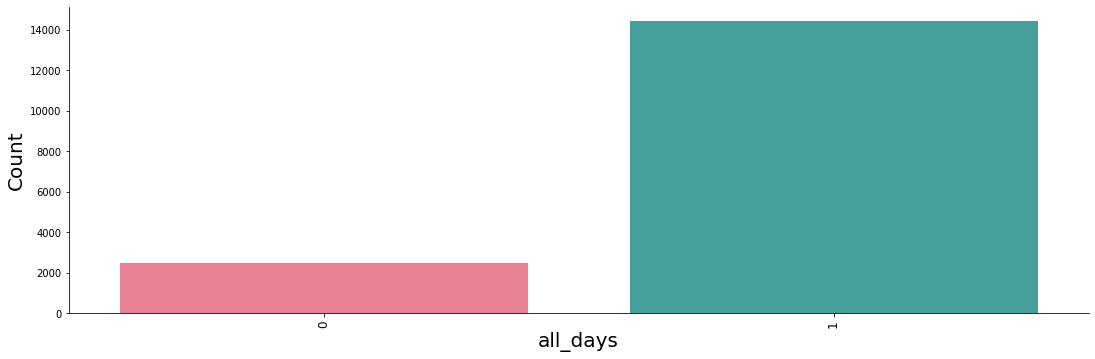

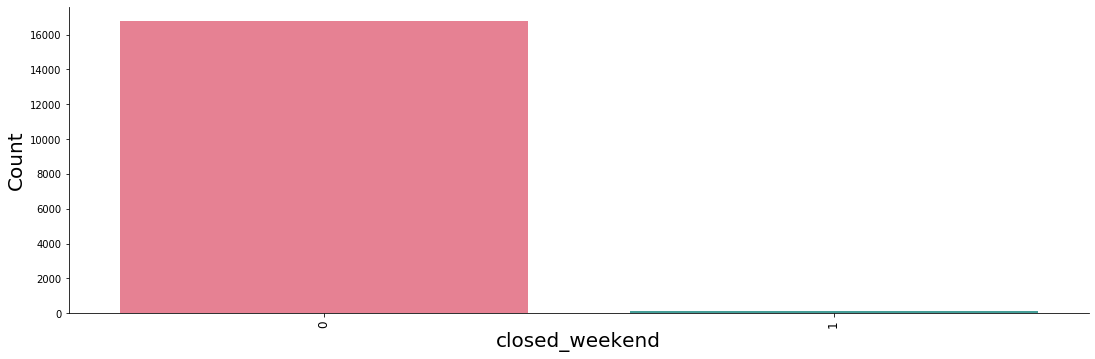

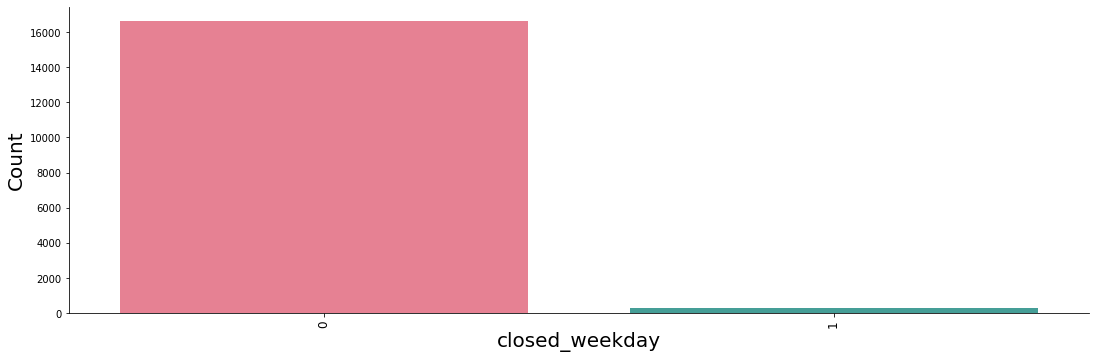

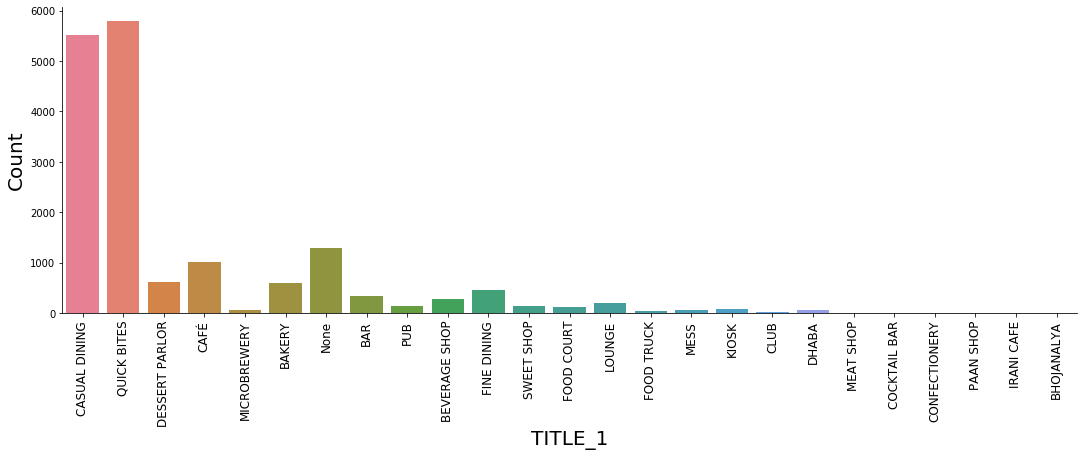

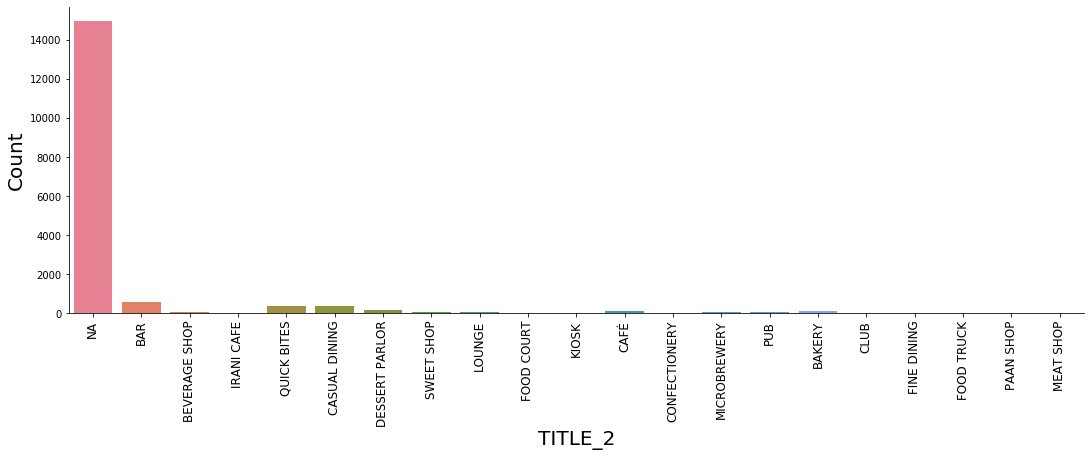

In [96]:
# For loop to plot counting Graph of Different Features.....
for i in df.drop(['CITY','LOCALITY','VOTES'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                palette='husl',
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph:            

1) Rs 300 cost is the maximum occuring value out of the rest.                                  
2) 3.9 Rating is the rating given by the people to the restaurant maximum number of times.                    
3) Maximum number of people likes North Indian Cuisine followed by chinese and then South indian.   
4) Restaurants opened all days are more.     
5) Restaurants closed on weekends are very less.    
6) Restaurants closed on weekdays are also very less.                 
7) Restaurants having title Quick Bites are more followed by Casual Dining.            

## Bivariant Analysis

In [97]:
#Separate categorical and numberical columns
obj_col = df.dtypes[df.dtypes == 'object']
num_col = df.dtypes[df.dtypes != 'object']

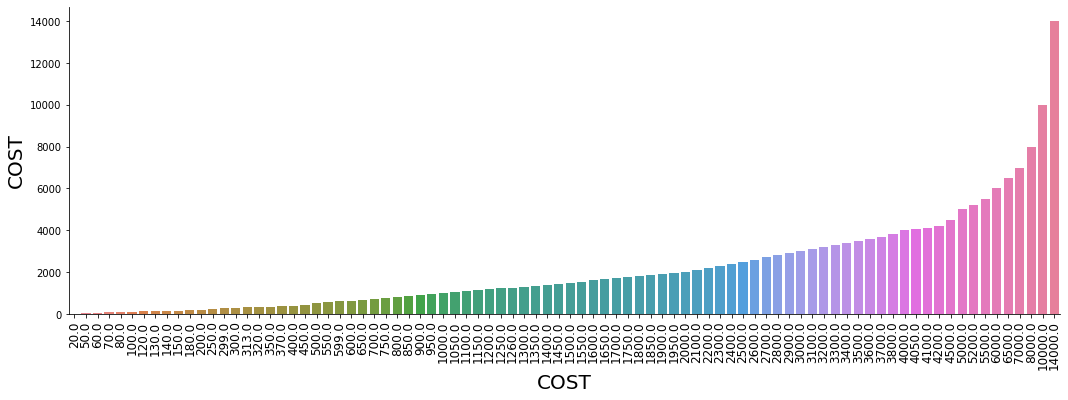

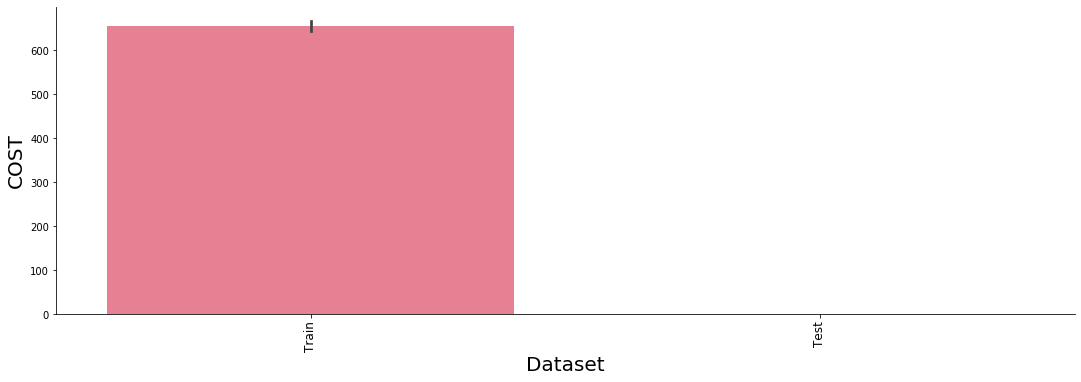

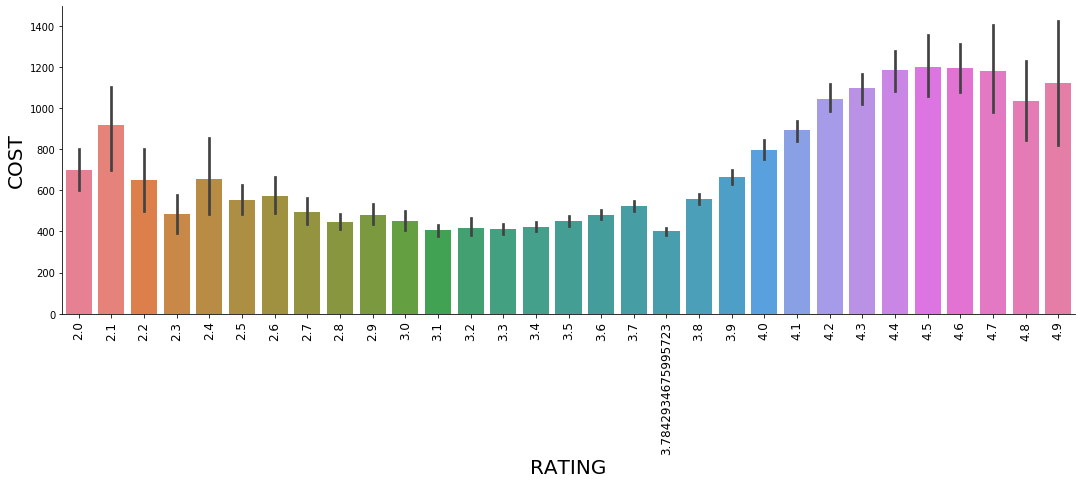

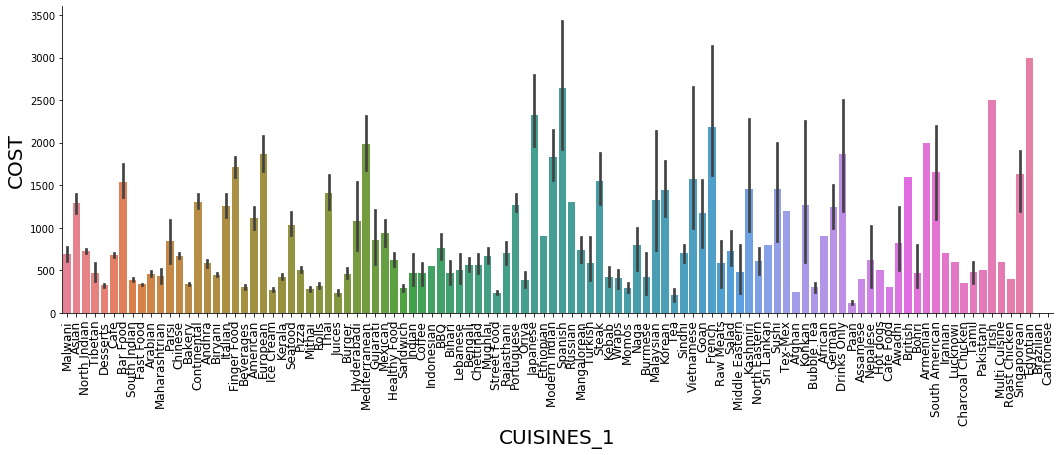

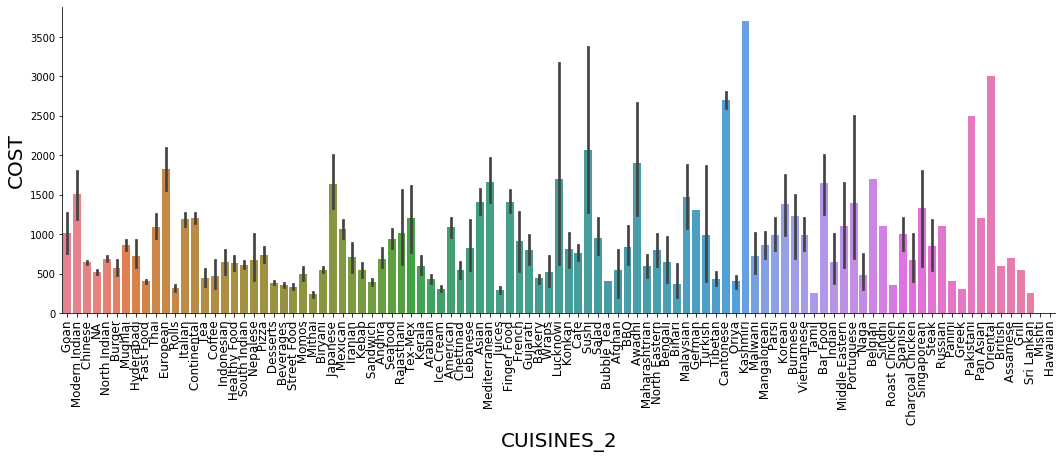

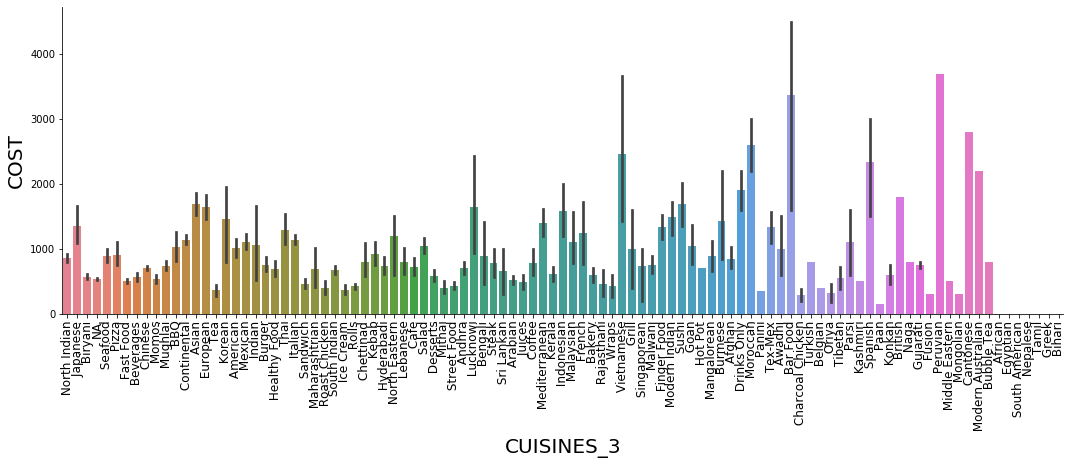

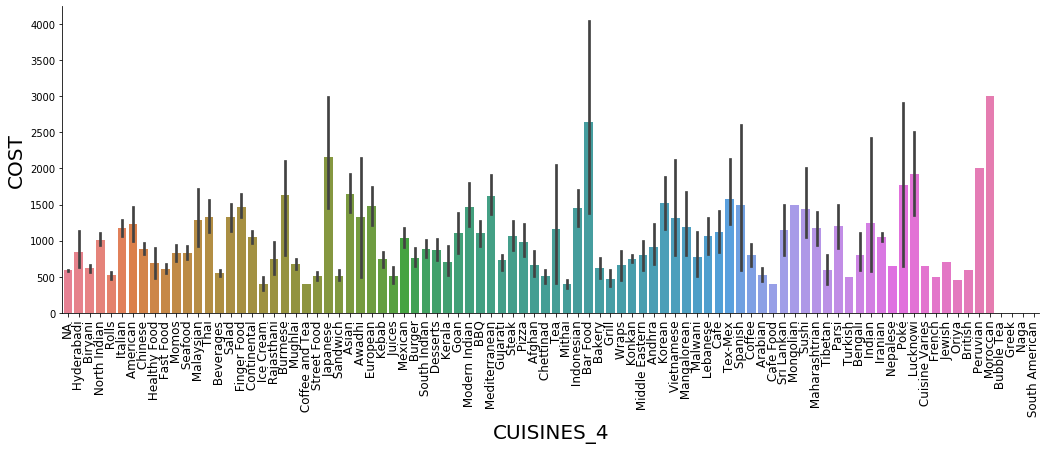

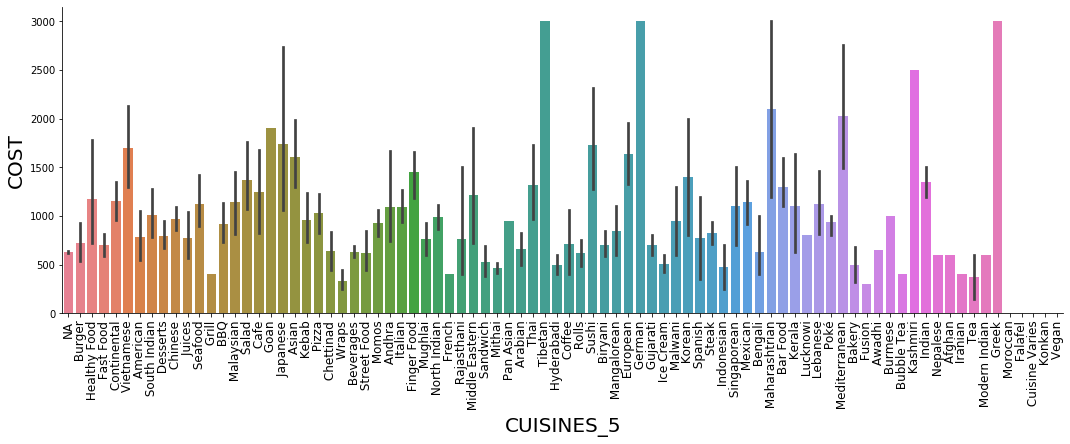

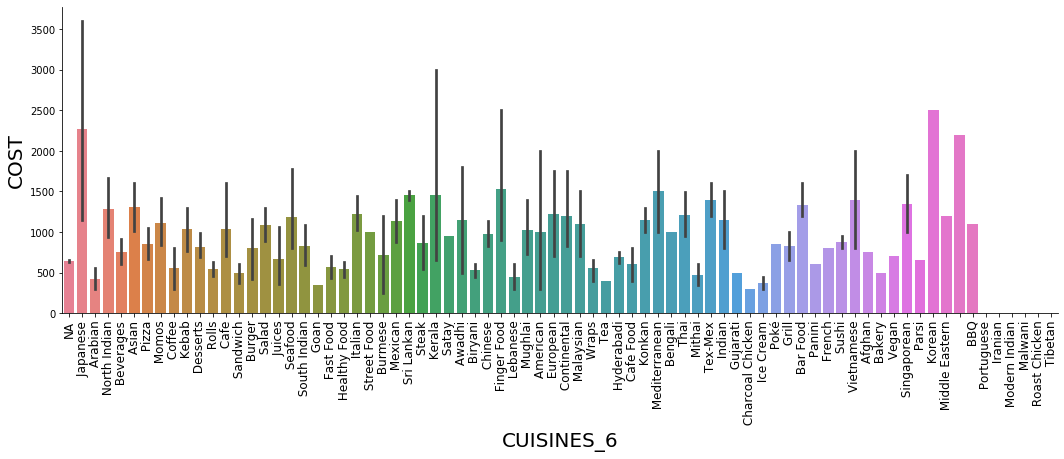

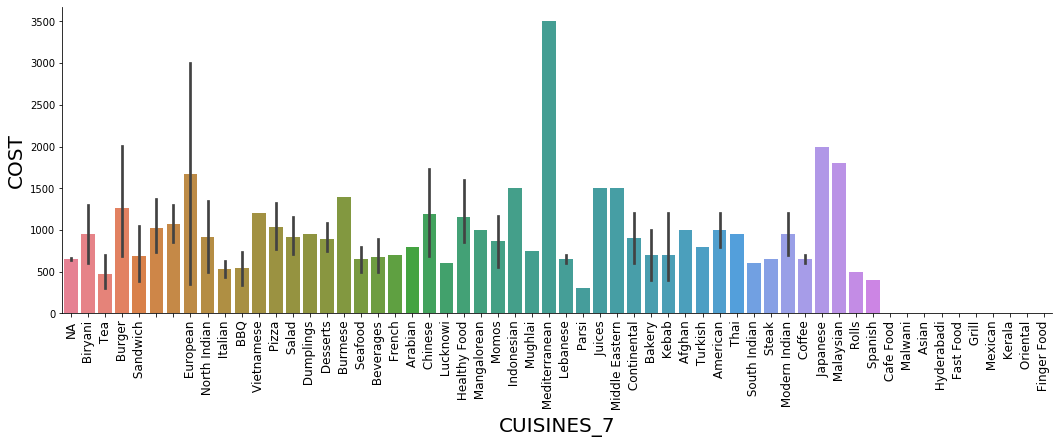

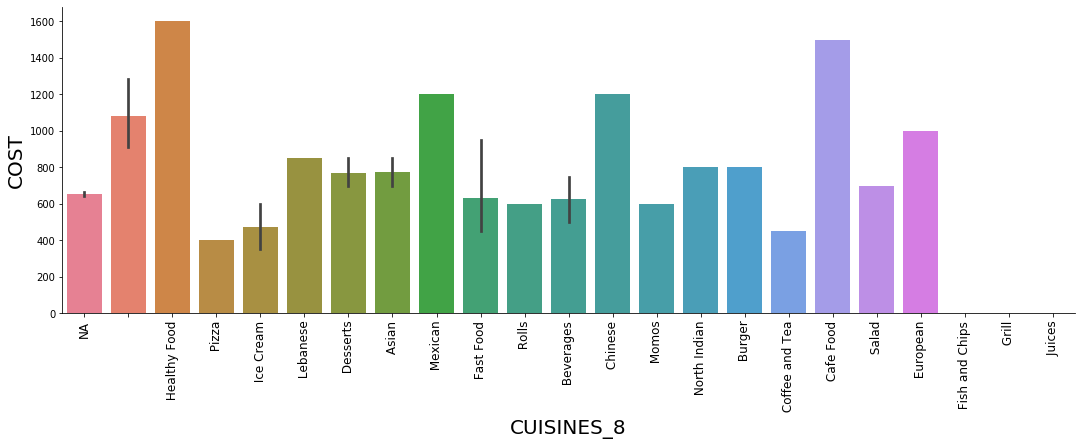

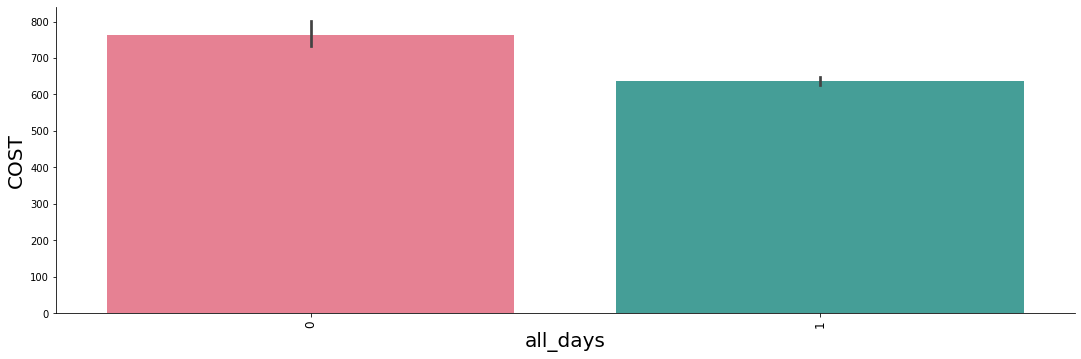

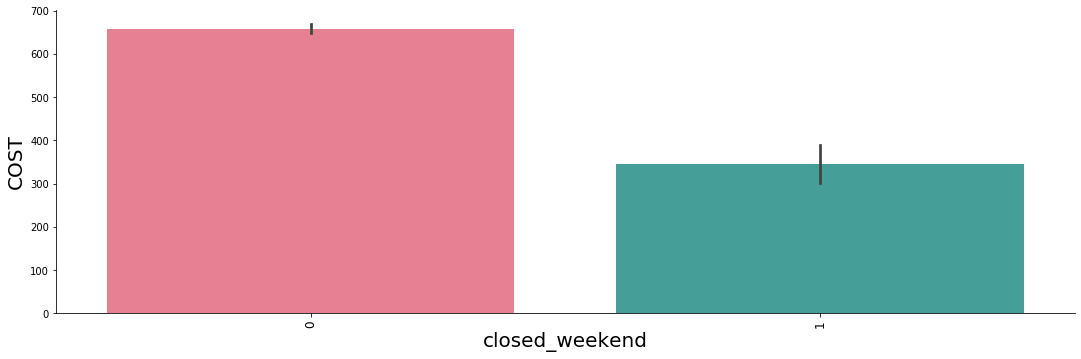

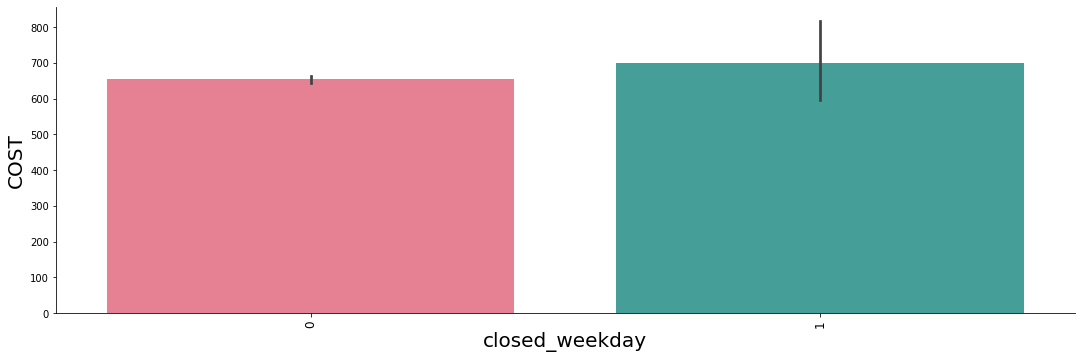

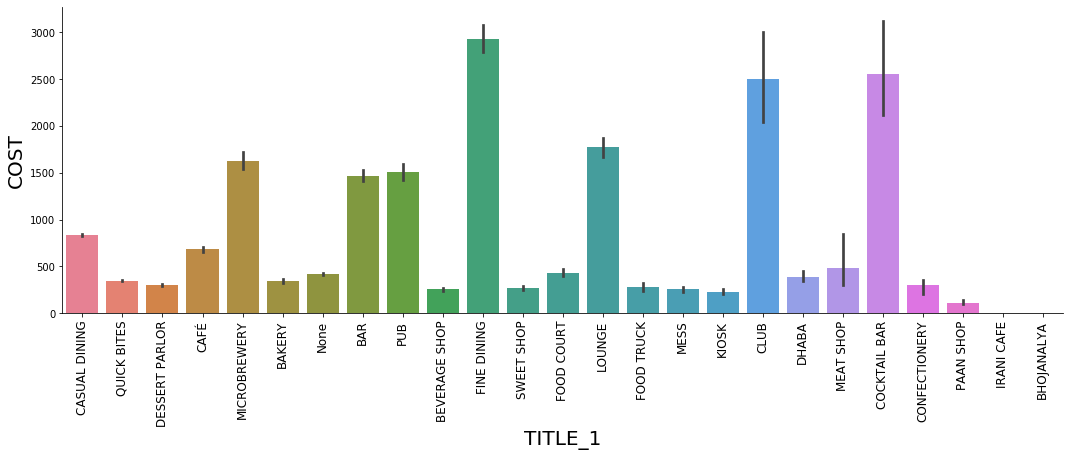

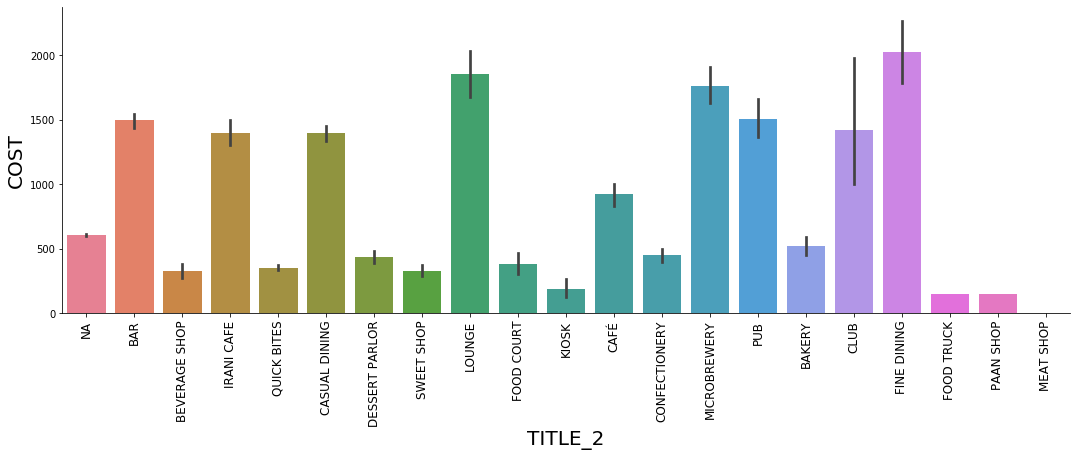

In [98]:
# for loop to plot graphs between COST and different features....
for i in df.drop(['CITY','LOCALITY','VOTES'],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                y='COST',
                kind='bar',
                height=5,
                aspect=3,
                palette='husl',
               )
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel("COST",fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the Graph:          

1) More the rating more the cost.               
2) Restaurant with Fine dining title has more cost.  
3) Kashmiri, Bar food, Lucknowi, sushi, Vietnamese, peruvian,Japanese,Mediterranean, europeon these cuisines have cost more than Rs 3000.

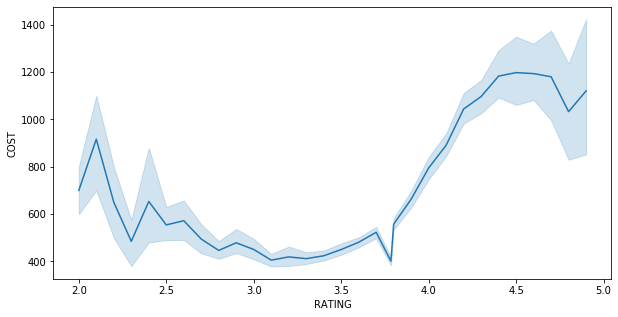

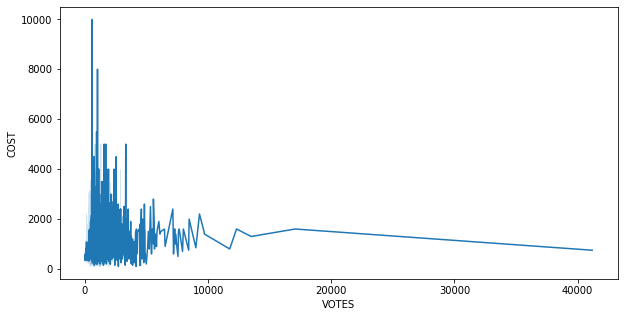

In [99]:
# Graph between Rating, Votes and cost....
for i in ['RATING' ,'VOTES']:
    plt.subplots(figsize=(10,5))
    sns.lineplot(x=i,y='COST',data=df)

##### Information:               
1) As the Rating increases the cost of the Food in the restaurant increases.

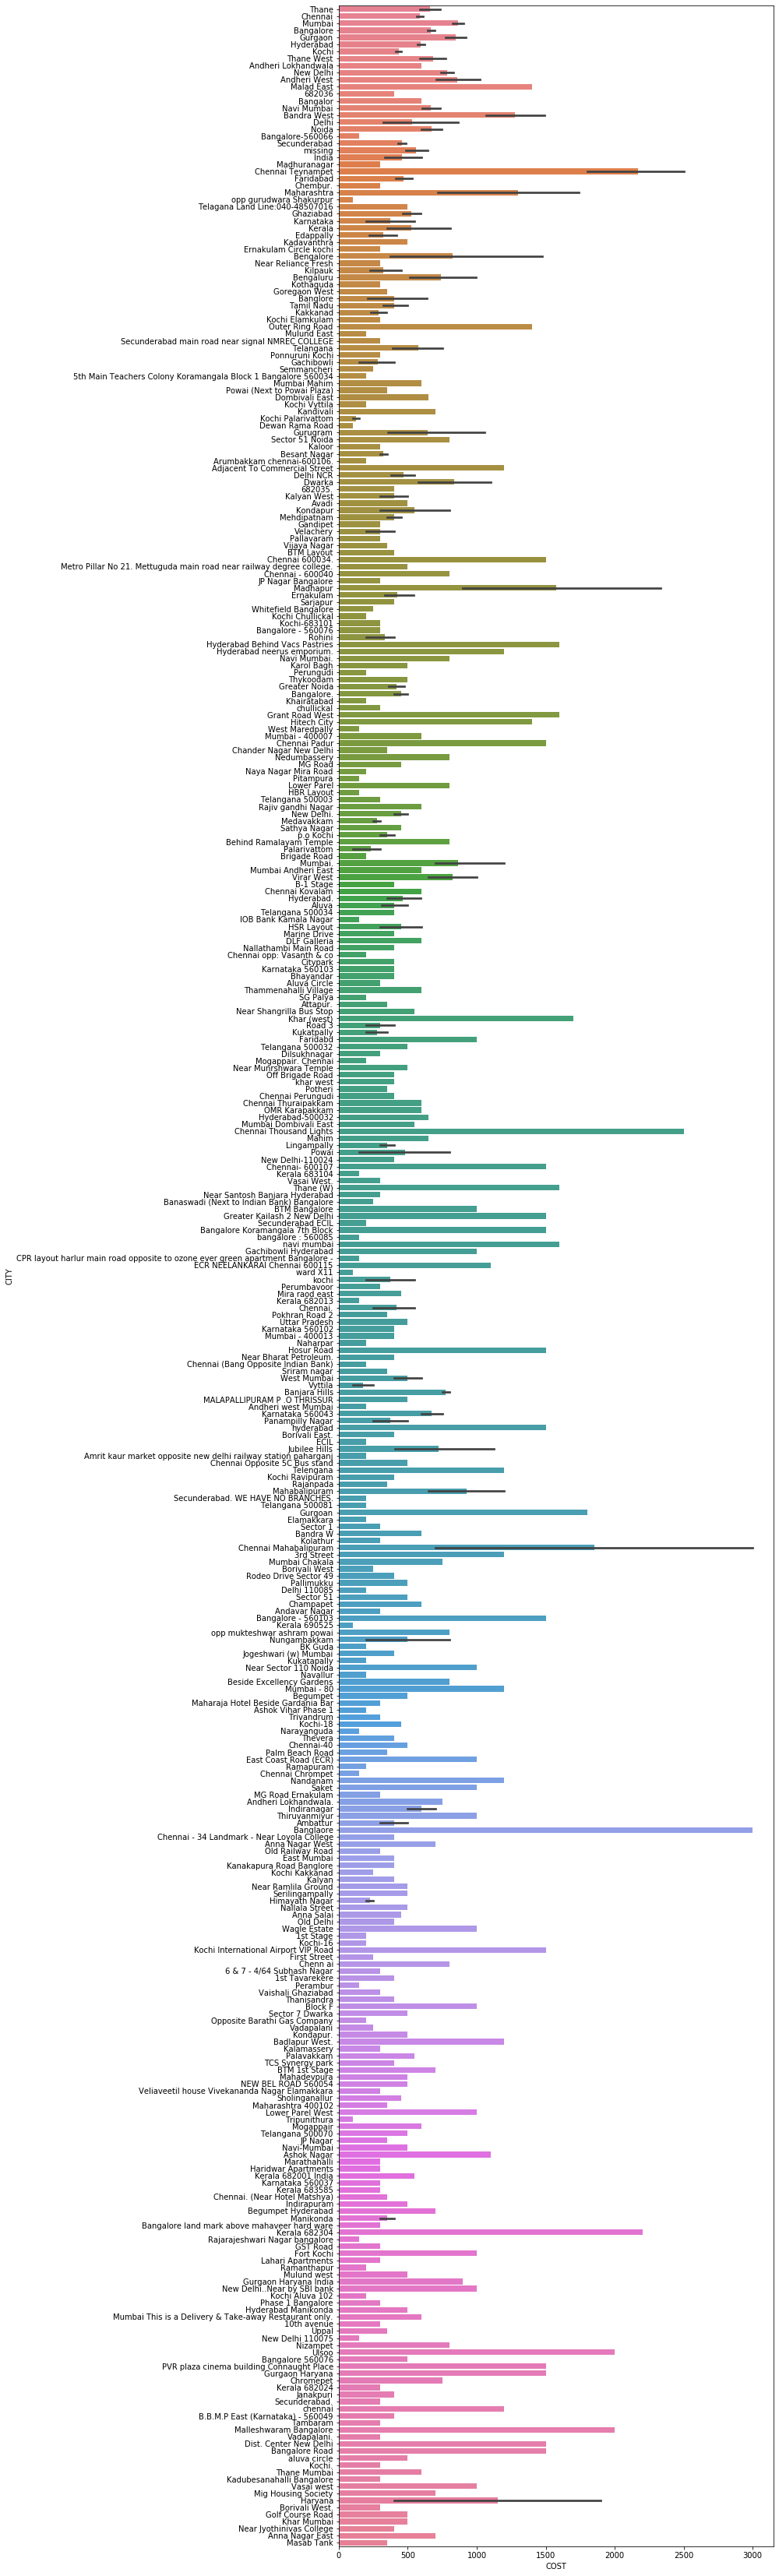

In [100]:
# Graph between CITY and COST
df_1=df.loc[df["Dataset"]=='Train']
plt.figure(figsize=(10,60))
sns.barplot(y='CITY',x='COST',data=df_1,palette='husl')

##### Banglore city have highest Food cost in Restaurant.

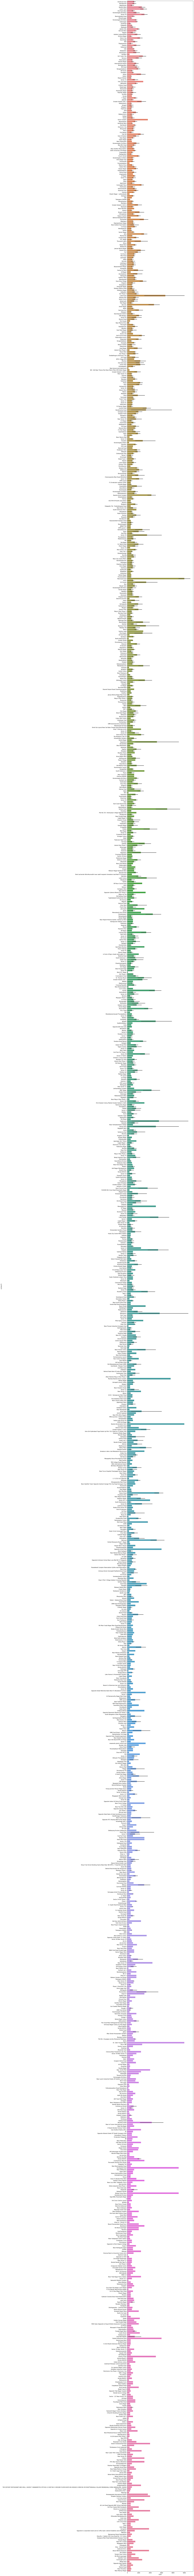

In [101]:
# Graph between LOCALITY and COST
plt.figure(figsize=(10,400))
sns.barplot(x='COST',y='LOCALITY',data=df_1,palette='husl')

##### Dr Zakir Husain Marg,Bandra Reclaimation Dock,Mansingh road are the Localities in which Retsaurant food cost is highest.

In [102]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in obj_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

CITY    COST  Dataset  LOCALITY    RATING  VOTES  CUISINES_1  \
0       400  1200.0        1       328  3.600000   49.0          61   
1        75  1500.0        1      1214  4.200000   30.0           6   
2        75   800.0        1      1272  3.800000  221.0          74   
3       277   800.0        1       161  4.100000   24.0         102   
4       277   300.0        1       709  3.800000  165.0          30   
...     ...     ...      ...       ...       ...    ...         ...   
16916   316     NaN        0      1184  3.900000  287.0          74   
16917    42     NaN        0       461  4.300000  469.0          15   
16918   128     NaN        0      1370  3.700000   53.0          29   
16919   216     NaN        0       642  3.784293    0.0          84   
16920    40     NaN        0      1148  3.700000   63.0          69   

       CUISINES_2  CUISINES_3  CUISINES_4  CUISINES_5  CUISINES_6  CUISINES_7  \
0              32          71          89          83          75          57   
1              62          45          89          83          75          57   
2              23          14          34          83          75          57   
3              23         100          89          83          75          57   
4             100         100          89          83          75          57   
...           ...         ...         ...         ...         ...         ...   
16916          64          23          89          83          75          57   
16917          68          82          72          82          75          57   
16918          68         100          89          83          75          57   
16919          12         100          89          83          75          57   
16920         100         100          89          83          75          57   

       CUISINES_8  all_days  closed_weekend  closed_weekday  TITLE_1  TITLE_2  
0              22         1               0               0        5       16  
1              22         1               0               0        5        1  
2              22         1               0               0        5       16  
3              22         1               0               0       23       16  
4              22         1               0               0        9       16  
...           ...       ...             ...             ...      ...      ...  
16916          22         1               0               0        5       16  
16917          22         1               0               0       20       16  
16918          22         1               0               0       23       16  
16919          22         0               0               0       23       16  
16920          22         1               0               0       23       16  

[16895 rows x 19 columns]

In [103]:
# Checking Skewness....
df.skew()

CITY               0.287317
COST               3.978358
Dataset           -1.152526
LOCALITY           0.352195
RATING            -0.553586
VOTES             12.702125
CUISINES_1        -0.016683
CUISINES_2         0.058541
CUISINES_3        -0.826330
CUISINES_4        -2.107453
CUISINES_5        -4.080269
CUISINES_6        -6.709247
CUISINES_7        -9.971851
CUISINES_8       -13.271808
all_days          -1.990313
closed_weekend    11.358817
closed_weekday     7.517750
TITLE_1            0.076347
TITLE_2           -3.077014
dtype: float64

In [104]:
# Removing Skewness
for i in df.drop(['COST'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [105]:
# Checking Skewness again
df.skew()

CITY               0.287317
COST               3.978358
Dataset           -1.152526
LOCALITY           0.352195
RATING            -0.553586
VOTES             -0.811701
CUISINES_1        -0.016683
CUISINES_2         0.058541
CUISINES_3        -0.826330
CUISINES_4        -2.107453
CUISINES_5        -4.080269
CUISINES_6        -6.709247
CUISINES_7        -9.971851
CUISINES_8       -13.271808
all_days          -1.990313
closed_weekend    11.358817
closed_weekday     7.517750
TITLE_1            0.076347
TITLE_2           -3.077014
dtype: float64

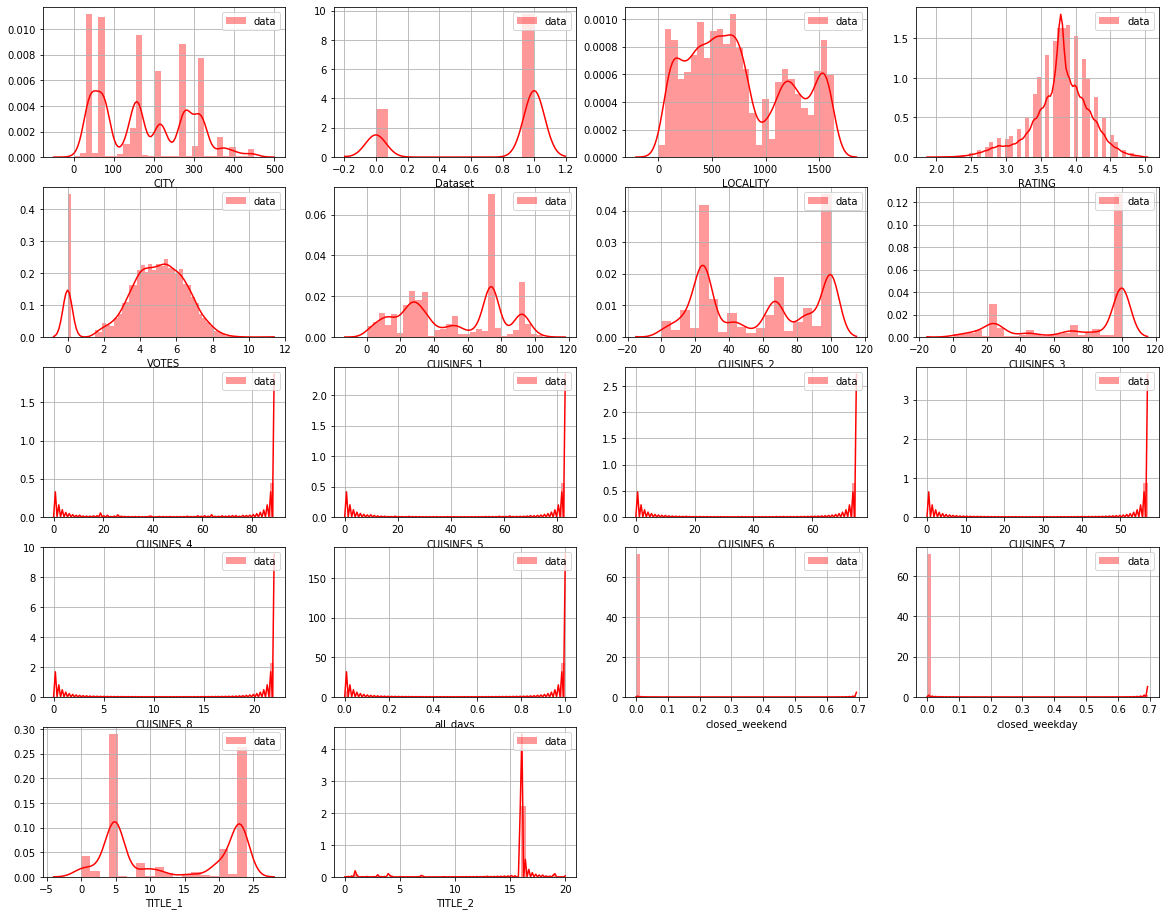

In [106]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df.drop(['COST'],axis=1).columns.values)):
    plt.subplot(5,4,i+1)
    sns.distplot(df[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [107]:
# Checking the correlation
df.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

(19.0, 0.0)

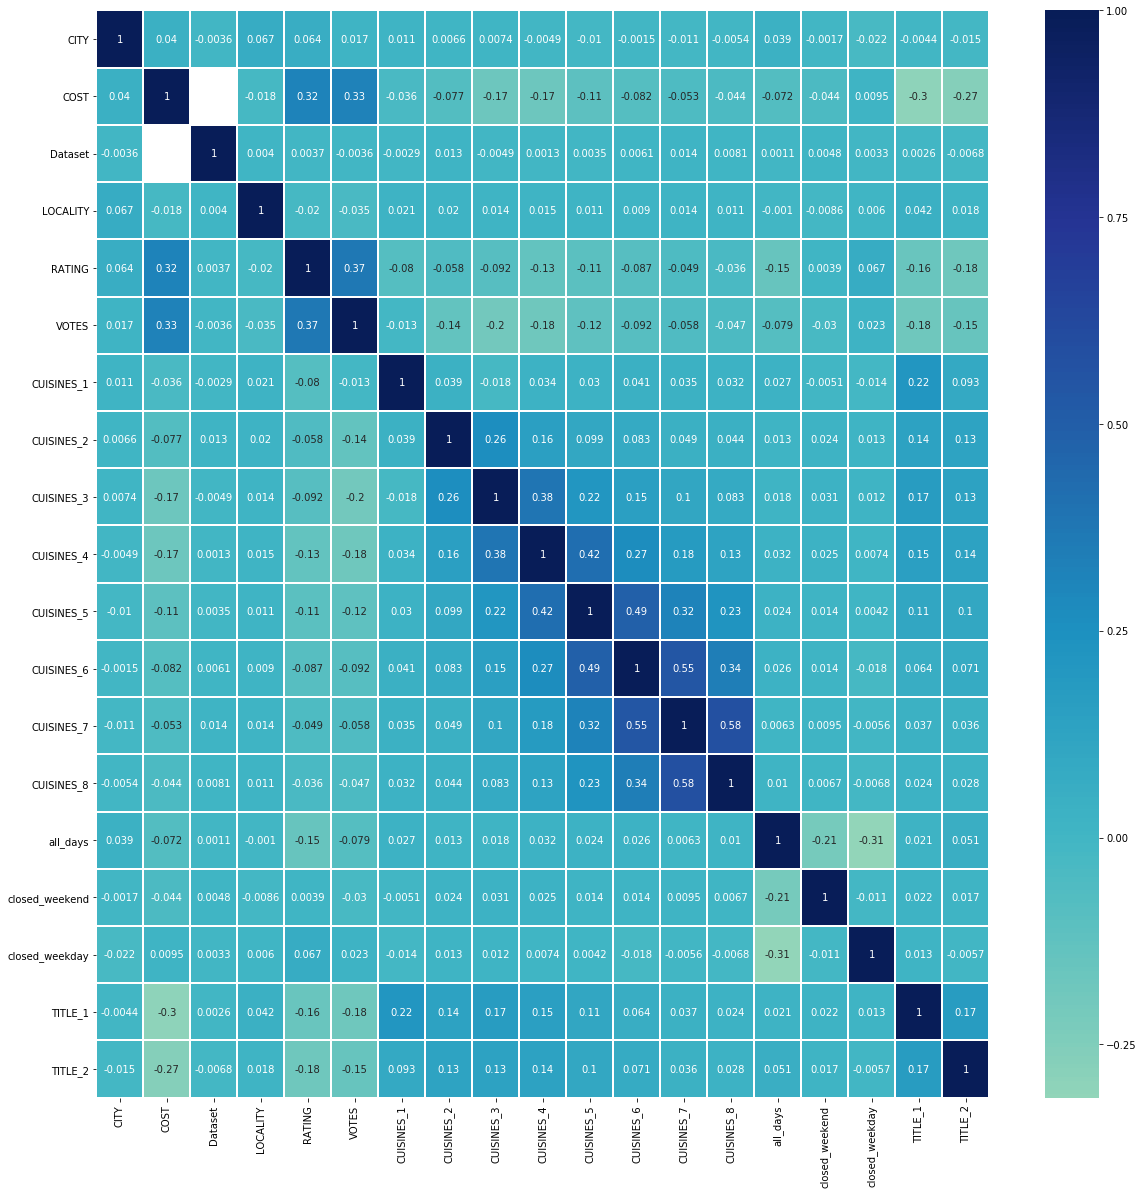

In [108]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [109]:
#Lets seprate the train and test from df( Dataset Train is having value==1) and ( Dataset Test is having value==0)
df_train=df.loc[df["Dataset"]==1]
df_test=df.loc[df["Dataset"]==0]

In [110]:
#re indexing the test dataset
df_test.reset_index(drop=True,inplace=True)

In [111]:
#Lets drop "Price" and "dataset" columns from the test dataset
#Also droping "dataset" columns from the train dataset
df_test.drop(columns=["COST","Dataset"],inplace=True)
df_train.drop(columns=["Dataset"],inplace=True)

In [112]:
#lets divide the df_train into input and output
x1 = df_train.drop("COST", axis=1)
y = df_train["COST"]

In [113]:
# Independent variables (no target column)
x1.head()

CITY  LOCALITY  RATING     VOTES  CUISINES_1  CUISINES_2  CUISINES_3  \
0   400       328     3.6  3.912023          61          32          71   
1    75      1214     4.2  3.433987           6          62          45   
2    75      1272     3.8  5.402677          74          23          14   
3   277       161     4.1  3.218876         102          23         100   
4   277       709     3.8  5.111988          30         100         100   

   CUISINES_4  CUISINES_5  CUISINES_6  CUISINES_7  CUISINES_8  all_days  \
0          89          83          75          57          22         1   
1          89          83          75          57          22         1   
2          34          83          75          57          22         1   
3          89          83          75          57          22         1   
4          89          83          75          57          22         1   

   closed_weekend  closed_weekday  TITLE_1  TITLE_2  
0             0.0             0.0        5       16  
1             0.0             0.0        5        1  
2             0.0             0.0        5       16  
3             0.0             0.0       23       16  
4             0.0             0.0        9       16

In [114]:
# Target variable
y

0        1200.0
1        1500.0
2         800.0
3         800.0
4         300.0
          ...  
12685     500.0
12686    1800.0
12687    1300.0
12688     400.0
12689     600.0
Name: COST, Length: 12665, dtype: float64

In [115]:
#checking shape of input variable
x1.shape

(12665, 17)

In [116]:
#lets bring all features to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x

CITY  LOCALITY    RATING     VOTES  CUISINES_1  CUISINES_2  \
0      2.021767 -0.935731 -0.460865 -0.346456    0.348854   -0.745715   
1     -0.936336  0.972723  1.032540 -0.584763   -1.548968    0.153049   
2     -0.936336  1.097656  0.036937  0.396655    0.797430   -1.015344   
3      0.902238 -1.295451  0.783639 -0.691999    1.763594   -1.015344   
4      0.902238 -0.115053  0.036937  0.251743   -0.720828    1.291484   
...         ...       ...       ...       ...         ...         ...   
12660 -0.162678 -0.791413  0.036937  0.846200    0.797430   -1.195097   
12661  0.902238 -1.301914  1.281441  1.244039   -0.410275   -0.955427   
12662  1.111581  1.692163  0.534738  0.899725   -0.513793   -0.955427   
12663 -0.936336 -0.091359 -0.709766 -0.553596    0.797430    0.872060   
12664 -0.162678  1.672777 -0.958667  0.953230    0.797430   -1.015344   

       CUISINES_3  CUISINES_4  CUISINES_5  CUISINES_6  CUISINES_7  CUISINES_8  \
0       -0.097395    0.448776    0.257253    0.162591    0.104305    0.074771   
1       -0.869974    0.448776    0.257253    0.162591    0.104305    0.074771   
2       -1.791125   -1.929941    0.257253    0.162591    0.104305    0.074771   
3        0.764327    0.448776    0.257253    0.162591    0.104305    0.074771   
4        0.764327    0.448776    0.257253    0.162591    0.104305    0.074771   
...           ...         ...         ...         ...         ...         ...   
12660   -0.780830    0.448776    0.257253    0.162591    0.104305    0.074771   
12661    0.764327    0.448776    0.257253    0.162591    0.104305    0.074771   
12662   -2.058556   -2.578681    0.257253    0.162591    0.104305    0.074771   
12663   -1.523694    0.059532    0.257253    0.162591    0.104305    0.074771   
12664    0.764327    0.448776    0.257253    0.162591    0.104305    0.074771   

       all_days  closed_weekend  closed_weekday   TITLE_1   TITLE_2  
0      0.415293        -0.08876       -0.131722 -0.902808  0.272571  
1      0.415293        -0.08876       -0.131722 -0.902808 -3.735614  
2      0.415293        -0.08876       -0.131722 -0.902808  0.272571  
3      0.415293        -0.08876       -0.131722  1.140652  0.272571  
4      0.415293        -0.08876       -0.131722 -0.448706  0.272571  
...         ...             ...             ...       ...       ...  
12660 -2.407940        -0.08876       -0.131722  1.140652  0.272571  
12661 -2.407940        -0.08876       -0.131722 -0.902808 -3.735614  
12662  0.415293        -0.08876       -0.131722  0.345973  0.272571  
12663  0.415293        -0.08876       -0.131722 -0.902808  0.272571  
12664  0.415293        -0.08876       -0.131722 -0.902808  0.272571  

[12665 rows x 17 columns]

## Model Training

In [118]:
#..............Defining Instances For Differnt Models and fitting best parameters found out from grid search........
KNR=KNeighborsRegressor()
SV=SVR()
LR=LinearRegression()
DTR=DecisionTreeRegressor()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ABR=AdaBoostRegressor()
LS=Lasso()
RD=Ridge()
EN=ElasticNet()
XGB= XGBRegressor()

In [119]:
#        Function which will find best Random State and then calculate Maximum R2_Score corresponding to it
#                                  and print R2_score in one go.
def max_r2_score(regr):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to',final_r_state,'is:', max_r_score)
    return final_r_state

In [120]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsRegressor',KNR))
models.append(('SVR',SV))
models.append(('LinearRegression',LR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('Lasso',LS))
models.append(('Ridge',RD))
models.append(('ElasticNet',EN))
models.append(('XGBRegressor',XGB))

#    Creating list to store scores...
Model=[]
Score=[]
R2_score=[]
cvs=[]
MSE=[]
RMSE=[]


# Loop through models
# ...............For Loop to Calculate R_2 Score, Cross Val Score and errors.........
for name, model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_r2_score(model)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,)
    model.fit(x_train,y_train)
    score=model.score(x_train, y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    r2_scor=r2_score(y_test,y_pred)
    print('R2 Score : ',r2_scor)
    R2_score.append(r2_scor*100)
    print('\n')
#.........Calculating cross_val_score...........
    cv_score=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    print('\n')
#.......Calculating Mean_square_error..........    
    mse=mean_squared_error(y_test,y_pred)
    print('Mean Squared Error : ',mse )
    MSE.append(mse)
    print('\n')
#.......Calculating.....Root_Mean_square_error.........   
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error : ',rmse )
    RMSE.append(rmse)
    print('\n')

*************************** KNeighborsRegressor *****************************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


max r2 score corresponding to 59 is: 0.3235426549505749
Learning Score :  0.5051496321044102
R2 Score :  0.3235426549505749


Cross Val Score :  0.3023879086350517


Mean Squared Error :  251945.92710526317


Root Mean Squared Error :  501.94215513868045


*************************** SVR *****************************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


max r2 score corresponding to 73 is: 0.10374107606006233
Learning Score :  0.07313000331167008
R2 Score :  0.10374107606006233


Cross Val Score :  0.09570489923384598


Mean Squared Error :  298105.2632618874


Root Mean Squared Error :  545.99016

In [121]:
#............. DataFrame to show all the calculated scores in one table........
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'R2_score':R2_score,'Cross_Val_Score':cvs,
                     'Mean_squared_error':MSE,'Root_Mean_squared_error':RMSE})   
result.style.background_gradient(cmap='YlGnBu')

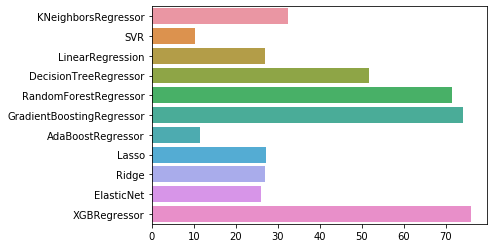

In [124]:
# visualisation of R2 Score
sns.barplot(y=Model,x=R2_score)

In [125]:
#...........Function of GridSearch to find best parameters and print them ........
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters):
    clf = GridSearchCV(estimator=mod,
                       param_grid=parameters,
                       scoring='r2' ,
                       cv=5,verbose=2,
                       n_jobs=-1)
    
    clf.fit(x_train,y_train)
    print(clf.best_params_)

In [ ]:
#.................Grid Search for XGBRegressor..........
from xgboost import XGBRegressor
xgb= XGBRegressor()
parameters= {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
              "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
              "min_child_weight" : [ 1, 3, 5, 7 ],
              "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
              "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
         }
grid_cv(xgb,parameters)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 41.9min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

In [ ]:
import lightgbm as lgb
lg = lgb.LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="r2")
grid_search.fit(x,y)
grid_search.best_estimator_

In [ ]:
lgbr=lgb.LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.05, max_depth=25,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=200, n_jobs=-1, num_leaves=300, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
max_r2_score(lgbr)

## Conclusion:

1) Rs 300 cost is the maximum occuring value out of the rest.
2) 3.9 Rating is the rating given by the people to the restaurant maximum number of times.
3) Maximum number of people likes North Indian Cuisine followed by chinese and then South indian.
4) Restaurants opened all days are more.
5) Restaurants closed on weekends are very less.
6) Restaurants closed on weekdays are also very less.
7) Restaurants having title Quick Bites are more followed by Casual Dining.
8) More the rating more the cost.
9) Restaurant with Fine dining title has more cost.
10) Kashmiri, Bar food, Lucknowi, sushi, Vietnamese, peruvian,Japanese,Mediterranean, europeon these cuisines have cost more than Rs 3000.
11) As the Rating increases the cost of the Food in the restaurant increases.
12) Banglore city have highest Food cost in Restaurant
13) Dr Zakir Husain Marg,Bandra Reclaimation Dock,Mansingh road are the Localities in which Retsaurant food cost is highest.



## Steps Followed: 

1) Data Analysis.
2) EDA Analysis.
3) Best parameters are found using Gridsearch cv and applied to models.
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.
5) AUC ROC Curves are made for each model.
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.
7) DecisionTreeClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.
8) Predicted values are saved in Project_19_Restaurant_Food_cost_submission.csv file.
9) Pickle file is named with Project_19_Restaurant_Food_cost_submission.pkl 